# Imports

In [ ]:
!pip3 install catboost
!pip install shap
!pip install xlrd 

In [ ]:
import catboost as cb
import numpy as np
import pandas as pd
import seaborn as sns
import shap
#import load_boston
from matplotlib import pyplot as pltfrom
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn import datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import transforms
import seaborn as sns

df = pd.read_excel ('Spectrum Database_March 2021.xlsx') 

In [ ]:
!pip install xlrd 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import transforms

df = pd.read_excel ('Spectrum Database_March 2021.xlsx') 

# Analyzing Australia 3G Spectrum Auction

In [ ]:
df = df[(df.countryName == 'Australia')]
 
df = df[df.awardName == '3G Auction']
 
df

,awardId,lotId,awardName,countryName,alpha3code,nBidders,date,awardClassDescription,availableSpectrumPaired,availableSpectrumUnpaired,licenceUse,awardComments,lotName,winner,freqBand,nationalLicence,region,blockFreq,paired,unpaired,licenceDuration,popCovered,reservePriceLocal,headlinePriceLocal,entrantReserved,lotComments
290,5,291,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",CapitalCity1,Vodafone,2.1GHz,0,Metropolitan,NaN,0.0,5.0,15.0,12400000.0,7950000.0,8750000.0,0.0,NaN
291,5,292,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",CapitalCity2,CKWWirelessPtyLtd,2.1GHz,0,Metropolitan,NaN,0.0,5.0,15.0,12400000.0,7950000.0,9450000.0,0.0,NaN
292,5,293,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Sydney1,Telstra,2.1GHz,0,Sydney,NaN,0.0,5.0,15.0,4297000.0,2650000.0,2652000.0,0.0,NaN
293,5,294,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Melbourne1,Telstra,2.1GHz,0,Melbourne,NaN,0.0,5.0,15.0,3246700.0,2120000.0,2122000.0,0.0,NaN
294,5,295,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Brisbane1,Telstra,2.1GHz,0,Brisbane,NaN,0.0,5.0,15.0,1921100.0,1272000.0,1273000.0,0.0,NaN
295,5,296,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Adelaide1,Telstra,2.1GHz,0,Adelaide,NaN,0.0,5.0,15.0,1094900.0,636000.0,636000.0,0.0,NaN
296,5,297,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Perth1,Telstra,2.1GHz,0,Perth,NaN,0.0,5.0,15.0,1189100.0,742000.0,742700.0,0.0,NaN
297,5,298,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Hobart1,Telstra,2.1GHz,0,Hobart,NaN,0.0,5.0,15.0,224300.0,212000.0,212200.0,0.0,NaN
298,5,299,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Darwin1,Telstra,2.1GHz,0,Darwin,NaN,0.0,5.0,15.0,90000.0,106000.0,106100.0,0.0,NaN
299,5,300,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Canberra1,Telstra,2.1GHz,0,Canberra,NaN,0.0,5.0,15.0,320600.0,212000.0,212200.0,0.0,NaN


In [ ]:
payment = pd.read_excel ('Spectrum Payments_March 2021.xlsx') 

payment


,lotId,year,amount,minAmount
0,1,0.0,6137000.0,867750.0
1,2,0.0,5322000.0,867750.0
2,3,0.0,7039000.0,867750.0
3,4,0.0,9902000.0,867750.0
4,5,0.0,954000.0,433870.0
...,...,...,...,...
64059,36710,0.0,24000.0,10000.0
64060,36711,0.0,24000.0,10000.0
64061,36712,0.0,24000.0,10000.0
64062,36713,0.0,24000.0,10000.0


In [ ]:

merged = pd.merge(df, payment, on='lotId', how='inner')

merged

,awardId,lotId,awardName,countryName,alpha3code,nBidders,date,awardClassDescription,availableSpectrumPaired,availableSpectrumUnpaired,licenceUse,awardComments,lotName,winner,freqBand,nationalLicence,region,blockFreq,paired,unpaired,licenceDuration,popCovered,reservePriceLocal,headlinePriceLocal,entrantReserved,lotComments,year,amount,minAmount
0,5,291,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",CapitalCity1,Vodafone,2.1GHz,0,Metropolitan,NaN,0.0,5.0,15.0,12400000.0,7950000.0,8750000.0,0.0,NaN,0.0,8750000.0,7950000.0
1,5,292,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",CapitalCity2,CKWWirelessPtyLtd,2.1GHz,0,Metropolitan,NaN,0.0,5.0,15.0,12400000.0,7950000.0,9450000.0,0.0,NaN,0.0,9450000.0,7950000.0
2,5,293,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Sydney1,Telstra,2.1GHz,0,Sydney,NaN,0.0,5.0,15.0,4297000.0,2650000.0,2652000.0,0.0,NaN,0.0,2652000.0,2650000.0
3,5,294,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Melbourne1,Telstra,2.1GHz,0,Melbourne,NaN,0.0,5.0,15.0,3246700.0,2120000.0,2122000.0,0.0,NaN,0.0,2122000.0,2120000.0
4,5,295,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Brisbane1,Telstra,2.1GHz,0,Brisbane,NaN,0.0,5.0,15.0,1921100.0,1272000.0,1273000.0,0.0,NaN,0.0,1273000.0,1272000.0
5,5,296,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Adelaide1,Telstra,2.1GHz,0,Adelaide,NaN,0.0,5.0,15.0,1094900.0,636000.0,636000.0,0.0,NaN,0.0,636000.0,636000.0
6,5,297,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Perth1,Telstra,2.1GHz,0,Perth,NaN,0.0,5.0,15.0,1189100.0,742000.0,742700.0,0.0,NaN,0.0,742700.0,742000.0
7,5,298,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Hobart1,Telstra,2.1GHz,0,Hobart,NaN,0.0,5.0,15.0,224300.0,212000.0,212200.0,0.0,NaN,0.0,212200.0,212000.0
8,5,299,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Darwin1,Telstra,2.1GHz,0,Darwin,NaN,0.0,5.0,15.0,90000.0,106000.0,106100.0,0.0,NaN,0.0,106100.0,106000.0
9,5,300,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Canberra1,Telstra,2.1GHz,0,Canberra,NaN,0.0,5.0,15.0,320600.0,212000.0,212200.0,0.0,NaN,0.0,212200.0,212000.0


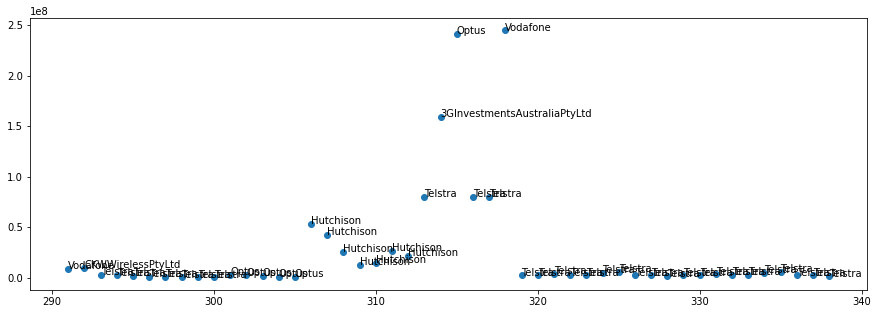

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,5))
# X axis : lotID
# Y axis : amount
plt.scatter(merged['lotId'], merged['amount'])

for i, winner in enumerate(merged['winner']):
  plt.annotate(winner, (merged['lotId'][i], merged['amount'][i]))

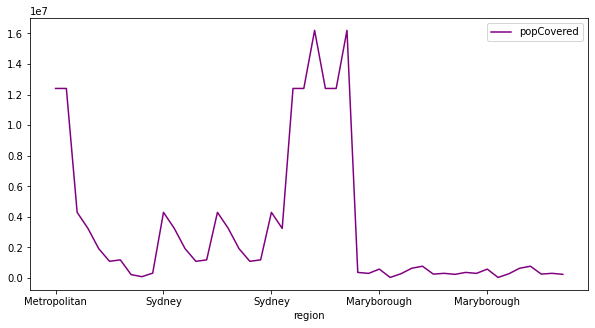

In [ ]:
merged.plot(x='region', y='popCovered',figsize=(10,5),color='purple')

For each company as we have kind of 6 of them lets find out:
*   Number of wins
*   Total Money Spend above reserved price
*   Average bids
*   Avg Winning bid over reserved 
*   Total population covered 
*   Overall population covered
*   Average population coved 
*   Regions


In [ ]:
dict_for_Population_Overall = {"owner":[], "population":[], "average_population":[], "total_spend":[], "average_spend":[], "average_spend_over_reserve":[]}

In [ ]:
def Get_Insights(For_Winner):
    # Prepare Variables
    # For_Winner = 'Telstra'
    Number_of_Wins = 0
    Total_Spend = int(0)
    Average_Biding_Price = 0
    Average_Biding_Price_Over_Reserved = 0
    Population_Coverd = 0
    Average_Population_Covered = 0
    Regions = set()

    for index, row in merged.iterrows():
        if row['winner'] == For_Winner:
            Number_of_Wins += 1
            Total_Spend += row['headlinePriceLocal']
            Average_Biding_Price_Over_Reserved +=  row['headlinePriceLocal'] -  row['reservePriceLocal']
            Population_Coverd += row['popCovered']
            Regions.add(row['region'])
    

    Average_Biding_Price = Total_Spend / Number_of_Wins
    Average_Biding_Price_Over_Reserved /= Number_of_Wins
    Average_Population_Covered = Population_Coverd / Number_of_Wins

    print(For_Winner)
    print("Won in ", Number_of_Wins, "  Bids") 
    print("Total Spend : ",Total_Spend)
    print("Average Bidding Price : ", round(Average_Biding_Price, 2))
    print("Average Bidding prie over Reserved : ", round(Average_Biding_Price_Over_Reserved, 2))
    print("Total population Coverd : ", Population_Coverd)
    dict_for_Population_Overall["owner"].append(For_Winner)
    dict_for_Population_Overall["population"].append(Population_Coverd)
    dict_for_Population_Overall["average_population"].append(round(Average_Population_Covered, 2))
    dict_for_Population_Overall["total_spend"].append(Total_Spend)
    dict_for_Population_Overall["average_spend"].append(round(Average_Biding_Price, 2))
    dict_for_Population_Overall["average_spend_over_reserve"].append(round(Average_Biding_Price_Over_Reserved, 2))
    print("Average Population Coverd : ", round(Average_Population_Covered, 2))
    print("Regions Coverd are : ", Regions)
    print("-----------------------------------------------------------------------------------------------------")
    #return dict_for_Population_Overall


In [ ]:
#dict_for_Population_Overall = {"owner":[],"population":[]}
    
for winner in merged['winner'].unique():
    Get_Insights(winner)
    print("")

Vodafone
Won in  2   Bids
Total Spend :  253750000.0
Average Bidding Price :  126875000.0
Average Bidding prie over Reserved :  30150000.0
Total population Coverd :  28600000.0
Average Population Coverd :  14300000.0
Regions Coverd are :  {'Metropolitan', 'National'}
-----------------------------------------------------------------------------------------------------

CKWWirelessPtyLtd
Won in  1   Bids
Total Spend :  9450000.0
Average Bidding Price :  9450000.0
Average Bidding prie over Reserved :  1500000.0
Total population Coverd :  12400000.0
Average Population Coverd :  12400000.0
Regions Coverd are :  {'Metropolitan'}
-----------------------------------------------------------------------------------------------------

Telstra
Won in  31   Bids
Total Spend :  302022200.0
Average Bidding Price :  9742651.61
Average Bidding prie over Reserved :  82974.19
Total population Coverd :  57184500.0
Average Population Coverd :  1844661.29
Regions Coverd are :  {'Cairns', 'RegionalWestAustra

In [ ]:
print(dict_for_Population_Overall)

{'owner': ['Vodafone', 'CKWWirelessPtyLtd', 'Telstra', 'Optus', 'Hutchison', '3GInvestmentsAustraliaPtyLtd'], 'population': [28600000.0, 12400000.0, 57184500.0, 27948800.0, 19292500.0, 12400000.0], 'average_population': [14300000.0, 12400000.0, 1844661.29, 4658133.33, 2756071.43, 12400000.0], 'total_spend': [253750000.0, 9450000.0, 302022200.0, 248770000.0, 196100000.0, 159000000.0], 'average_spend': [126875000.0, 9450000.0, 9742651.61, 41461666.67, 28014285.71, 159000000.0], 'average_spend_over_reserve': [30150000.0, 1500000.0, 82974.19, 9308333.33, 0.0, 0.0]}


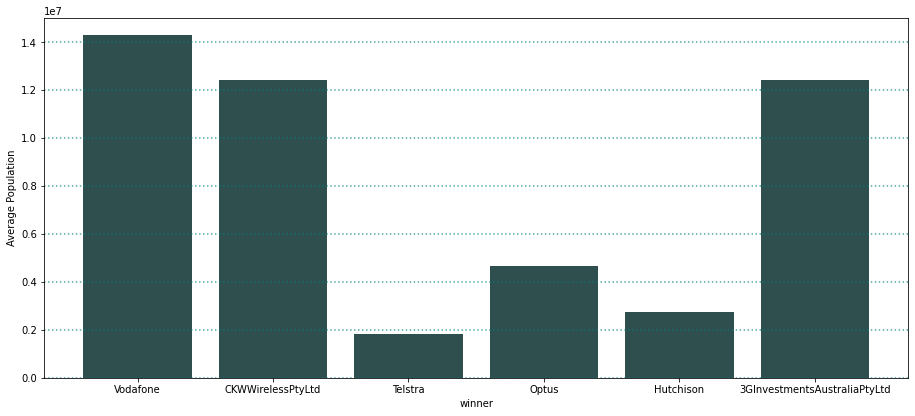

In [ ]:

# Plot of Average population of each owner  
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
langs = dict_for_Population_Overall['owner']
students = dict_for_Population_Overall['average_population']
ax.bar(langs,students,color='darkslategray',width=0.8)
plt.xlabel('winner')
plt.ylabel('Average Population')
plt.grid(color="teal", linestyle=':', linewidth=1.5 ,axis='y', alpha=0.7)
plt.show()    

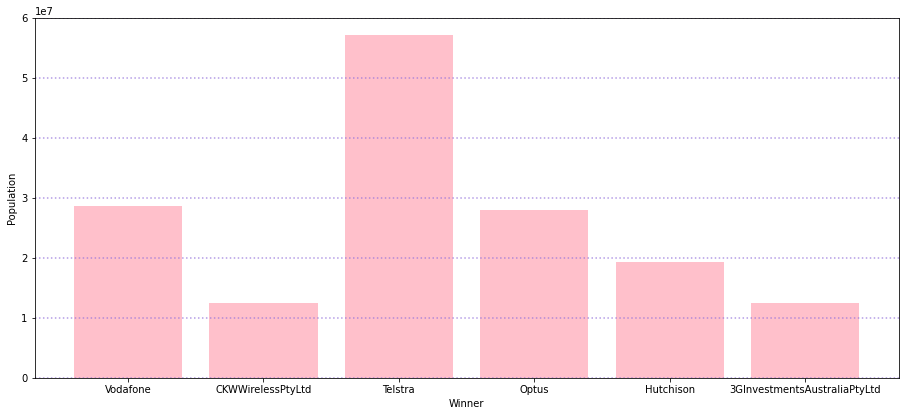

In [ ]:
# Plot of TOtal population of each owner
# Plot of Average population of each owner  
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
langs = dict_for_Population_Overall['owner']
students = dict_for_Population_Overall['population']
ax.bar(langs,students,color='pink',width=0.8)
plt.xlabel('Winner')
plt.ylabel('Population')
plt.grid(color='mediumpurple', linestyle=':', linewidth=1.5, axis='y', alpha=0.7)
plt.show()

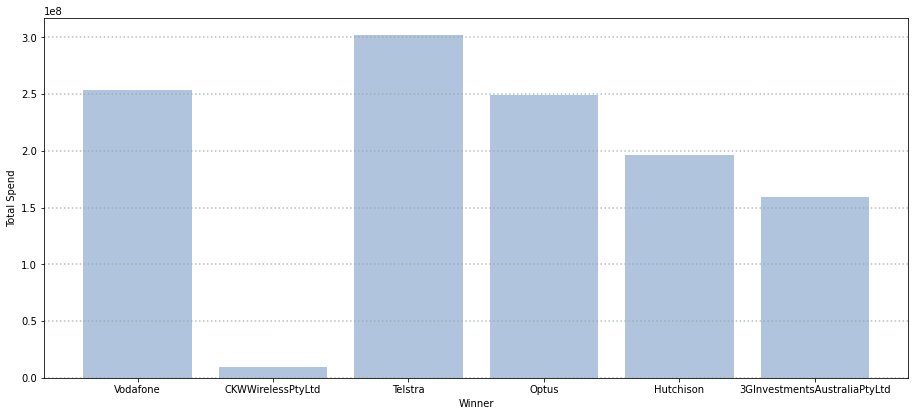

In [ ]:
# Plot of total spending of each owner
# Plot of Average population of each owner  
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
langs = dict_for_Population_Overall['owner']
students = dict_for_Population_Overall['total_spend']
ax.bar(langs,students,color='lightsteelblue',width=0.8)
plt.xlabel('Winner')
plt.ylabel('Total Spend')
plt.grid(color='#95a5a6', linestyle=':', linewidth=1.5, axis='y', alpha=0.7)
plt.show()

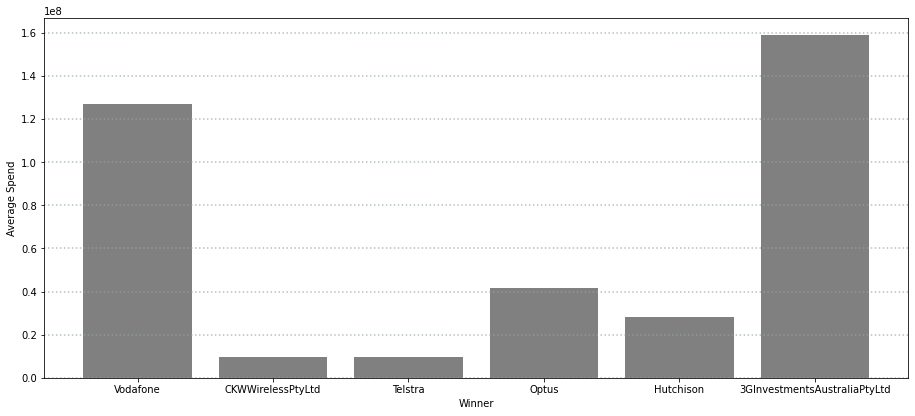

In [ ]:
# plot of average spending of each ownerr  
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
langs = dict_for_Population_Overall['owner']
students = dict_for_Population_Overall['average_spend']
ax.bar(langs,students,color='grey',width=0.8)
plt.xlabel('Winner')
plt.ylabel('Average Spend')
plt.grid(color='#95a5a6', linestyle=':', linewidth=1.5, axis='y', alpha=0.7)
plt.show()

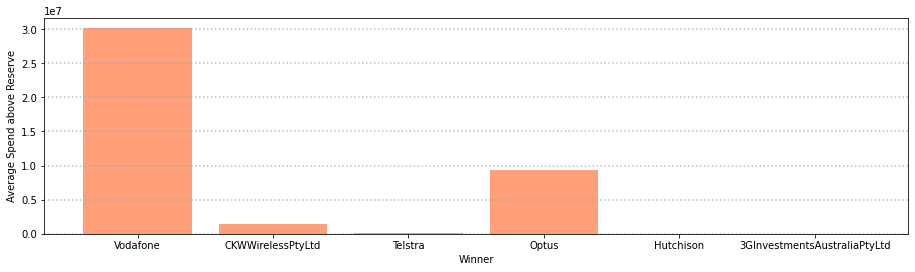

In [ ]:
# plot of average spending over reserve  
fig = plt.figure(figsize=(12, 3))
ax = fig.add_axes([0,0,1,1])
langs = dict_for_Population_Overall['owner']
students = dict_for_Population_Overall['average_spend_over_reserve']
ax.bar(langs,students,color='lightsalmon',width=0.8)
plt.grid(color='#95a5a6', linestyle=':', linewidth=1.5, axis='y', alpha=0.7)
plt.xlabel('Winner')
plt.ylabel('Average Spend above Reserve')
plt.show()

In [ ]:
# Make a copy to save preds for next year
Data_3G_next_year_preds = merged.copy()

In [ ]:
# Model
# Remove column name 
merged.drop(['minAmount', 'amount'], axis = 1)

,awardId,lotId,awardName,countryName,alpha3code,nBidders,date,awardClassDescription,availableSpectrumPaired,availableSpectrumUnpaired,licenceUse,awardComments,lotName,winner,freqBand,nationalLicence,region,blockFreq,paired,unpaired,licenceDuration,popCovered,reservePriceLocal,headlinePriceLocal,entrantReserved,lotComments,year
0,5,291,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",CapitalCity1,Vodafone,2.1GHz,0,Metropolitan,NaN,0.0,5.0,15.0,12400000.0,7950000.0,8750000.0,0.0,NaN,0.0
1,5,292,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",CapitalCity2,CKWWirelessPtyLtd,2.1GHz,0,Metropolitan,NaN,0.0,5.0,15.0,12400000.0,7950000.0,9450000.0,0.0,NaN,0.0
2,5,293,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Sydney1,Telstra,2.1GHz,0,Sydney,NaN,0.0,5.0,15.0,4297000.0,2650000.0,2652000.0,0.0,NaN,0.0
3,5,294,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Melbourne1,Telstra,2.1GHz,0,Melbourne,NaN,0.0,5.0,15.0,3246700.0,2120000.0,2122000.0,0.0,NaN,0.0
4,5,295,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Brisbane1,Telstra,2.1GHz,0,Brisbane,NaN,0.0,5.0,15.0,1921100.0,1272000.0,1273000.0,0.0,NaN,0.0
5,5,296,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Adelaide1,Telstra,2.1GHz,0,Adelaide,NaN,0.0,5.0,15.0,1094900.0,636000.0,636000.0,0.0,NaN,0.0
6,5,297,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Perth1,Telstra,2.1GHz,0,Perth,NaN,0.0,5.0,15.0,1189100.0,742000.0,742700.0,0.0,NaN,0.0
7,5,298,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Hobart1,Telstra,2.1GHz,0,Hobart,NaN,0.0,5.0,15.0,224300.0,212000.0,212200.0,0.0,NaN,0.0
8,5,299,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Darwin1,Telstra,2.1GHz,0,Darwin,NaN,0.0,5.0,15.0,90000.0,106000.0,106100.0,0.0,NaN,0.0
9,5,300,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Canberra1,Telstra,2.1GHz,0,Canberra,NaN,0.0,5.0,15.0,320600.0,212000.0,212200.0,0.0,NaN,0.0


### Handle Null Values


In [ ]:
# Handle Nulls
merged_cols = merged.columns.to_list()
mv = merged[merged_cols].isnull().sum()
mp = mv / len(merged)*100
mp

awardId                        0.0
lotId                          0.0
awardName                      0.0
countryName                    0.0
alpha3code                     0.0
nBidders                       0.0
date                           0.0
awardClassDescription          0.0
availableSpectrumPaired        0.0
availableSpectrumUnpaired      0.0
licenceUse                     0.0
awardComments                  0.0
lotName                        0.0
winner                         0.0
freqBand                       0.0
nationalLicence                0.0
region                         0.0
blockFreq                    100.0
paired                         0.0
unpaired                       0.0
licenceDuration                0.0
popCovered                     0.0
reservePriceLocal              0.0
headlinePriceLocal             0.0
entrantReserved                0.0
lotComments                  100.0
year                           0.0
amount                         0.0
minAmount           

In [ ]:
# Drop columns with null values 
# These columns have null value throughout
merged = merged.drop(['lotComments', 'awardComments'], axis = 1)

In [ ]:
# Delete columns which have only one or null values overall
for col in merged.columns.to_list():
    count = merged[col].nunique()
    if count == 1:
        del merged[col]
        print(col)
merged

awardId
awardName
countryName
alpha3code
nBidders
date
awardClassDescription
availableSpectrumPaired
availableSpectrumUnpaired
licenceUse
freqBand
licenceDuration
entrantReserved
year


,lotId,lotName,winner,nationalLicence,region,blockFreq,paired,unpaired,popCovered,reservePriceLocal,headlinePriceLocal,amount,minAmount
0,291,CapitalCity1,Vodafone,0,Metropolitan,NaN,0.0,5.0,12400000.0,7950000.0,8750000.0,8750000.0,7950000.0
1,292,CapitalCity2,CKWWirelessPtyLtd,0,Metropolitan,NaN,0.0,5.0,12400000.0,7950000.0,9450000.0,9450000.0,7950000.0
2,293,Sydney1,Telstra,0,Sydney,NaN,0.0,5.0,4297000.0,2650000.0,2652000.0,2652000.0,2650000.0
3,294,Melbourne1,Telstra,0,Melbourne,NaN,0.0,5.0,3246700.0,2120000.0,2122000.0,2122000.0,2120000.0
4,295,Brisbane1,Telstra,0,Brisbane,NaN,0.0,5.0,1921100.0,1272000.0,1273000.0,1273000.0,1272000.0
5,296,Adelaide1,Telstra,0,Adelaide,NaN,0.0,5.0,1094900.0,636000.0,636000.0,636000.0,636000.0
6,297,Perth1,Telstra,0,Perth,NaN,0.0,5.0,1189100.0,742000.0,742700.0,742700.0,742000.0
7,298,Hobart1,Telstra,0,Hobart,NaN,0.0,5.0,224300.0,212000.0,212200.0,212200.0,212000.0
8,299,Darwin1,Telstra,0,Darwin,NaN,0.0,5.0,90000.0,106000.0,106100.0,106100.0,106000.0
9,300,Canberra1,Telstra,0,Canberra,NaN,0.0,5.0,320600.0,212000.0,212200.0,212200.0,212000.0


### Frequency Encoding

In [ ]:
# Frequency Encoding
def Frequency_Encode(col):
    # print(col)
    fe = merged.groupby(col).size() / len(merged)
    merged.loc[:, col + '_freq_encode'] = merged[col].map(fe)
    merged

for col in merged.columns.to_list():
    # print(col, type(merged[col]))
    if merged[col].dtype == 'object':
        Frequency_Encode(col)
        del merged[col]

merged

,lotId,nationalLicence,paired,unpaired,popCovered,reservePriceLocal,headlinePriceLocal,amount,minAmount,lotName_freq_encode,winner_freq_encode,region_freq_encode,blockFreq_freq_encode
0,291,0,0.0,5.0,12400000.0,7950000.0,8750000.0,8750000.0,7950000.0,0.020833,0.041667,0.125000,NaN
1,292,0,0.0,5.0,12400000.0,7950000.0,9450000.0,9450000.0,7950000.0,0.020833,0.020833,0.125000,NaN
2,293,0,0.0,5.0,4297000.0,2650000.0,2652000.0,2652000.0,2650000.0,0.020833,0.645833,0.083333,NaN
3,294,0,0.0,5.0,3246700.0,2120000.0,2122000.0,2122000.0,2120000.0,0.020833,0.645833,0.083333,NaN
4,295,0,0.0,5.0,1921100.0,1272000.0,1273000.0,1273000.0,1272000.0,0.020833,0.645833,0.062500,NaN
5,296,0,0.0,5.0,1094900.0,636000.0,636000.0,636000.0,636000.0,0.020833,0.645833,0.062500,NaN
6,297,0,0.0,5.0,1189100.0,742000.0,742700.0,742700.0,742000.0,0.020833,0.645833,0.062500,NaN
7,298,0,0.0,5.0,224300.0,212000.0,212200.0,212200.0,212000.0,0.020833,0.645833,0.020833,NaN
8,299,0,0.0,5.0,90000.0,106000.0,106100.0,106100.0,106000.0,0.020833,0.645833,0.020833,NaN
9,300,0,0.0,5.0,320600.0,212000.0,212200.0,212200.0,212000.0,0.020833,0.645833,0.020833,NaN


In [ ]:
x = merged.copy()
del x['amount']
del x['minAmount']
# del x['headlinePriceLocal']
y = pd.DataFrame(merged.headlinePriceLocal)
x

,lotId,nationalLicence,paired,unpaired,popCovered,reservePriceLocal,headlinePriceLocal,lotName_freq_encode,winner_freq_encode,region_freq_encode,blockFreq_freq_encode
0,291,0,0.0,5.0,12400000.0,7950000.0,8750000.0,0.020833,0.041667,0.125000,NaN
1,292,0,0.0,5.0,12400000.0,7950000.0,9450000.0,0.020833,0.020833,0.125000,NaN
2,293,0,0.0,5.0,4297000.0,2650000.0,2652000.0,0.020833,0.645833,0.083333,NaN
3,294,0,0.0,5.0,3246700.0,2120000.0,2122000.0,0.020833,0.645833,0.083333,NaN
4,295,0,0.0,5.0,1921100.0,1272000.0,1273000.0,0.020833,0.645833,0.062500,NaN
5,296,0,0.0,5.0,1094900.0,636000.0,636000.0,0.020833,0.645833,0.062500,NaN
6,297,0,0.0,5.0,1189100.0,742000.0,742700.0,0.020833,0.645833,0.062500,NaN
7,298,0,0.0,5.0,224300.0,212000.0,212200.0,0.020833,0.645833,0.020833,NaN
8,299,0,0.0,5.0,90000.0,106000.0,106100.0,0.020833,0.645833,0.020833,NaN
9,300,0,0.0,5.0,320600.0,212000.0,212200.0,0.020833,0.645833,0.020833,NaN


In [ ]:
y

,headlinePriceLocal
0,8750000.0
1,9450000.0
2,2652000.0
3,2122000.0
4,1273000.0
5,636000.0
6,742700.0
7,212200.0
8,106100.0
9,212200.0


In [ ]:
print(x.shape, y.shape)

(48, 11) (48, 1)


In [ ]:
# Generating Next year Expected Prices
x_test = merged.copy()
x_test['reservePriceLocal'] = x_test['headlinePriceLocal']
del x_test['amount']
del x_test['minAmount']
# del x['headlinePriceLocal']
y_test = pd.DataFrame(merged.headlinePriceLocal)
x_test

,lotId,nationalLicence,paired,unpaired,popCovered,reservePriceLocal,headlinePriceLocal,lotName_freq_encode,winner_freq_encode,region_freq_encode,blockFreq_freq_encode
0,291,0,0.0,5.0,12400000.0,8750000.0,8750000.0,0.020833,0.041667,0.125000,NaN
1,292,0,0.0,5.0,12400000.0,9450000.0,9450000.0,0.020833,0.020833,0.125000,NaN
2,293,0,0.0,5.0,4297000.0,2652000.0,2652000.0,0.020833,0.645833,0.083333,NaN
3,294,0,0.0,5.0,3246700.0,2122000.0,2122000.0,0.020833,0.645833,0.083333,NaN
4,295,0,0.0,5.0,1921100.0,1273000.0,1273000.0,0.020833,0.645833,0.062500,NaN
5,296,0,0.0,5.0,1094900.0,636000.0,636000.0,0.020833,0.645833,0.062500,NaN
6,297,0,0.0,5.0,1189100.0,742700.0,742700.0,0.020833,0.645833,0.062500,NaN
7,298,0,0.0,5.0,224300.0,212200.0,212200.0,0.020833,0.645833,0.020833,NaN
8,299,0,0.0,5.0,90000.0,106100.0,106100.0,0.020833,0.645833,0.020833,NaN
9,300,0,0.0,5.0,320600.0,212200.0,212200.0,0.020833,0.645833,0.020833,NaN


### Correlarion Matrix

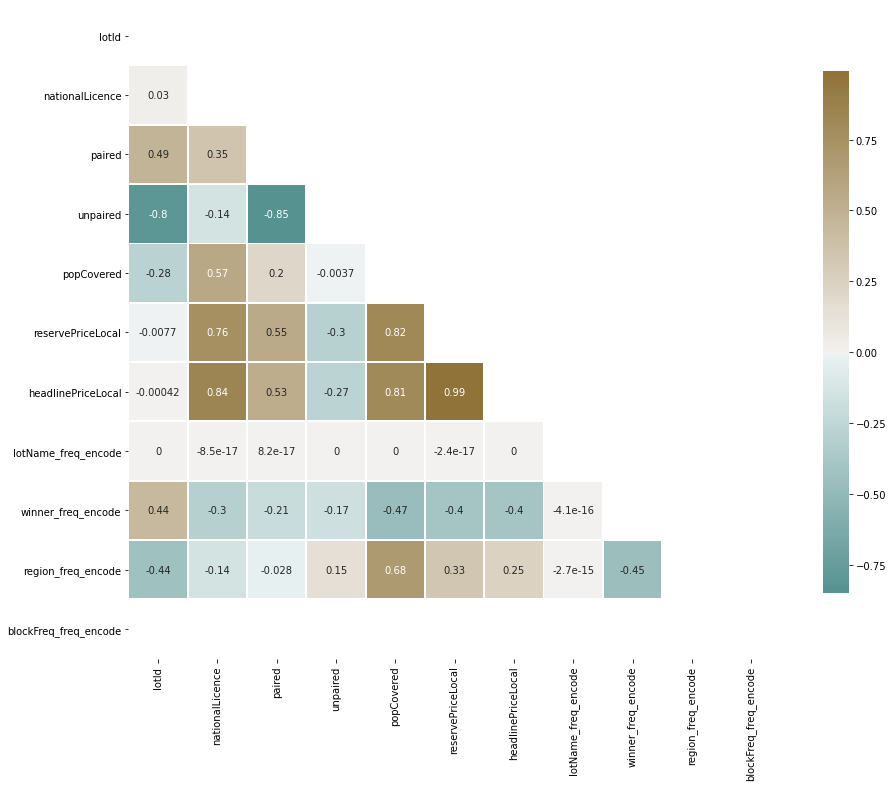

In [ ]:
# Compute the correlation matrix
corr = x.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(190, 60, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .8}, annot=True)

### Model

In [ ]:
# x has train
# y has target var
del x['headlinePriceLocal']

train_dataset = cb.Pool(x, y)
model = cb.CatBoostRegressor(loss_function='RMSE')
grid = {'iterations': [150, 200, 300],
        'learning_rate': [0.1],
        'depth': [8, 10, 15],
        'l2_leaf_reg': [3, 5]}
model.grid_search(grid, train_dataset)


0:	learn: 51348076.9839370	test: 79769643.7285291	best: 79769643.7285291 (0)	total: 1.01ms	remaining: 151ms
1:	learn: 50265837.9239892	test: 77788876.0953625	best: 77788876.0953625 (1)	total: 2.4ms	remaining: 177ms
2:	learn: 48436314.6154938	test: 75551303.1790528	best: 75551303.1790528 (2)	total: 3.01ms	remaining: 148ms
3:	learn: 46227507.6775225	test: 73372276.2163594	best: 73372276.2163594 (3)	total: 3.66ms	remaining: 134ms
4:	learn: 44895839.8611652	test: 71626895.6012005	best: 71626895.6012005 (4)	total: 4.44ms	remaining: 129ms
5:	learn: 43301729.9880964	test: 69353173.8627224	best: 69353173.8627224 (5)	total: 4.94ms	remaining: 119ms
6:	learn: 42056685.4508030	test: 67715972.7333047	best: 67715972.7333047 (6)	total: 5.9ms	remaining: 121ms
7:	learn: 40815534.2274447	test: 65970906.3399063	best: 65970906.3399063 (7)	total: 6.44ms	remaining: 114ms
8:	learn: 39655661.1790916	test: 64398021.9669063	best: 64398021.9669063 (8)	total: 7.12ms	remaining: 112ms
9:	learn: 38535437.1972942	tes

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

In [ ]:
pred = model.predict(x)
rmse = (np.sqrt(mean_squared_error(y, pred)))
r2 = r2_score(y, pred)
print('Testing performance')
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 29827.65
R2: 1.00


In [ ]:
# Take predictions on test datase
del x_test['headlinePriceLocal']
test_pred = model.predict(x_test)
rmse_test = (np.sqrt(mean_squared_error(x_test['reservePriceLocal'], test_pred)))
r2_test = r2_score(y, test_pred)
print('Testing performance')
print('RMSE: {:.2f}'.format(rmse_test))
print('R2: {:.2f}'.format(r2_test))
test_pred

Testing performance
RMSE: 29827.65
R2: 1.00


array([8.72953355e+06, 9.46952047e+06, 2.68670645e+06, 2.09326912e+06,
       1.28461497e+06, 5.93699406e+05, 7.60340459e+05, 2.32821207e+05,
       8.54923228e+04, 2.06831850e+05, 2.73622225e+06, 2.20754497e+06,
       1.33487391e+06, 7.12549915e+05, 7.68933755e+05, 5.30375895e+07,
       4.23211184e+07, 2.54314472e+07, 1.27910776e+07, 1.48081359e+07,
       2.65018720e+07, 2.12457961e+07, 7.94633921e+07, 1.58969038e+08,
       2.41013955e+08, 7.95262667e+07, 7.95262667e+07, 2.44986502e+08,
       2.26255633e+06, 2.23336661e+06, 3.31612368e+06, 2.21535305e+06,
       2.22727861e+06, 4.42232312e+06, 5.54722238e+06, 2.19006346e+06,
       2.18752346e+06, 1.12329106e+06, 2.13477760e+06, 2.10681138e+06,
       3.24295897e+06, 2.33273081e+06, 2.26916292e+06, 4.65248184e+06,
       5.78200112e+06, 2.12708442e+06, 2.12737688e+06, 1.07118945e+06])

Text(0.5, 0, 'Feature Importance')

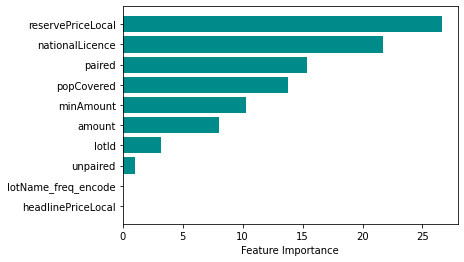

In [ ]:
sorted_feature_importance = model.feature_importances_.argsort()

plt.barh(merged.columns[sorted_feature_importance], 
        model.feature_importances_[sorted_feature_importance], 
        color='darkcyan')
plt.xlabel("Feature Importance") 



All-NaN slice encountered


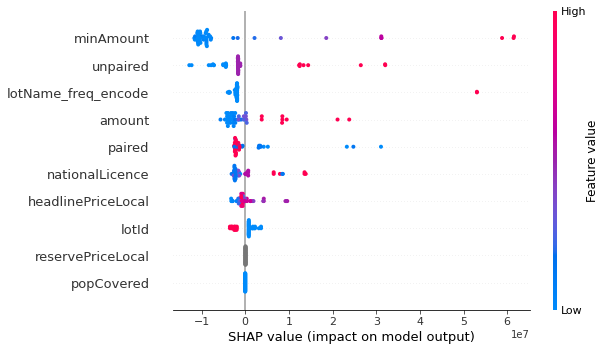

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x)
shap.summary_plot(shap_values, x, feature_names = merged.columns[sorted_feature_importance])

In [ ]:
# ITs right time to save the preds
Data_3G_next_year_preds

,awardId,lotId,awardName,countryName,alpha3code,nBidders,date,awardClassDescription,availableSpectrumPaired,availableSpectrumUnpaired,licenceUse,awardComments,lotName,winner,freqBand,nationalLicence,region,blockFreq,paired,unpaired,licenceDuration,popCovered,reservePriceLocal,headlinePriceLocal,entrantReserved,lotComments,year,amount,minAmount
0,5,291,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",CapitalCity1,Vodafone,2.1GHz,0,Metropolitan,NaN,0.0,5.0,15.0,12400000.0,7950000.0,8750000.0,0.0,NaN,0.0,8750000.0,7950000.0
1,5,292,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",CapitalCity2,CKWWirelessPtyLtd,2.1GHz,0,Metropolitan,NaN,0.0,5.0,15.0,12400000.0,7950000.0,9450000.0,0.0,NaN,0.0,9450000.0,7950000.0
2,5,293,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Sydney1,Telstra,2.1GHz,0,Sydney,NaN,0.0,5.0,15.0,4297000.0,2650000.0,2652000.0,0.0,NaN,0.0,2652000.0,2650000.0
3,5,294,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Melbourne1,Telstra,2.1GHz,0,Melbourne,NaN,0.0,5.0,15.0,3246700.0,2120000.0,2122000.0,0.0,NaN,0.0,2122000.0,2120000.0
4,5,295,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Brisbane1,Telstra,2.1GHz,0,Brisbane,NaN,0.0,5.0,15.0,1921100.0,1272000.0,1273000.0,0.0,NaN,0.0,1273000.0,1272000.0
5,5,296,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Adelaide1,Telstra,2.1GHz,0,Adelaide,NaN,0.0,5.0,15.0,1094900.0,636000.0,636000.0,0.0,NaN,0.0,636000.0,636000.0
6,5,297,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Perth1,Telstra,2.1GHz,0,Perth,NaN,0.0,5.0,15.0,1189100.0,742000.0,742700.0,0.0,NaN,0.0,742700.0,742000.0
7,5,298,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Hobart1,Telstra,2.1GHz,0,Hobart,NaN,0.0,5.0,15.0,224300.0,212000.0,212200.0,0.0,NaN,0.0,212200.0,212000.0
8,5,299,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Darwin1,Telstra,2.1GHz,0,Darwin,NaN,0.0,5.0,15.0,90000.0,106000.0,106100.0,0.0,NaN,0.0,106100.0,106000.0
9,5,300,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Canberra1,Telstra,2.1GHz,0,Canberra,NaN,0.0,5.0,15.0,320600.0,212000.0,212200.0,0.0,NaN,0.0,212200.0,212000.0


In [ ]:
Data_3G_next_year_preds['reservePriceLocal'] = Data_3G_next_year_preds['headlinePriceLocal']
Data_3G_next_year_preds['minAmount'] = Data_3G_next_year_preds['headlinePriceLocal']
Data_3G_next_year_preds

,awardId,lotId,awardName,countryName,alpha3code,nBidders,date,awardClassDescription,availableSpectrumPaired,availableSpectrumUnpaired,licenceUse,awardComments,lotName,winner,freqBand,nationalLicence,region,blockFreq,paired,unpaired,licenceDuration,popCovered,reservePriceLocal,headlinePriceLocal,entrantReserved,lotComments,year,amount,minAmount
0,5,291,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",CapitalCity1,Vodafone,2.1GHz,0,Metropolitan,NaN,0.0,5.0,15.0,12400000.0,8750000.0,8750000.0,0.0,NaN,0.0,8750000.0,8750000.0
1,5,292,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",CapitalCity2,CKWWirelessPtyLtd,2.1GHz,0,Metropolitan,NaN,0.0,5.0,15.0,12400000.0,9450000.0,9450000.0,0.0,NaN,0.0,9450000.0,9450000.0
2,5,293,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Sydney1,Telstra,2.1GHz,0,Sydney,NaN,0.0,5.0,15.0,4297000.0,2652000.0,2652000.0,0.0,NaN,0.0,2652000.0,2652000.0
3,5,294,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Melbourne1,Telstra,2.1GHz,0,Melbourne,NaN,0.0,5.0,15.0,3246700.0,2122000.0,2122000.0,0.0,NaN,0.0,2122000.0,2122000.0
4,5,295,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Brisbane1,Telstra,2.1GHz,0,Brisbane,NaN,0.0,5.0,15.0,1921100.0,1273000.0,1273000.0,0.0,NaN,0.0,1273000.0,1273000.0
5,5,296,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Adelaide1,Telstra,2.1GHz,0,Adelaide,NaN,0.0,5.0,15.0,1094900.0,636000.0,636000.0,0.0,NaN,0.0,636000.0,636000.0
6,5,297,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Perth1,Telstra,2.1GHz,0,Perth,NaN,0.0,5.0,15.0,1189100.0,742700.0,742700.0,0.0,NaN,0.0,742700.0,742700.0
7,5,298,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Hobart1,Telstra,2.1GHz,0,Hobart,NaN,0.0,5.0,15.0,224300.0,212200.0,212200.0,0.0,NaN,0.0,212200.0,212200.0
8,5,299,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Darwin1,Telstra,2.1GHz,0,Darwin,NaN,0.0,5.0,15.0,90000.0,106100.0,106100.0,0.0,NaN,0.0,106100.0,106100.0
9,5,300,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Canberra1,Telstra,2.1GHz,0,Canberra,NaN,0.0,5.0,15.0,320600.0,212200.0,212200.0,0.0,NaN,0.0,212200.0,212200.0


In [ ]:
Data_3G_next_year_preds['headlinePriceLocal'] = test_pred
Data_3G_next_year_preds['amount'] = test_pred

Data_3G_next_year_preds

,awardId,lotId,awardName,countryName,alpha3code,nBidders,date,awardClassDescription,availableSpectrumPaired,availableSpectrumUnpaired,licenceUse,awardComments,lotName,winner,freqBand,nationalLicence,region,blockFreq,paired,unpaired,licenceDuration,popCovered,reservePriceLocal,headlinePriceLocal,entrantReserved,lotComments,year,amount,minAmount
0,5,291,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",CapitalCity1,Vodafone,2.1GHz,0,Metropolitan,NaN,0.0,5.0,15.0,12400000.0,8750000.0,8.729534e+06,0.0,NaN,0.0,8.729534e+06,8750000.0
1,5,292,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",CapitalCity2,CKWWirelessPtyLtd,2.1GHz,0,Metropolitan,NaN,0.0,5.0,15.0,12400000.0,9450000.0,9.469520e+06,0.0,NaN,0.0,9.469520e+06,9450000.0
2,5,293,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Sydney1,Telstra,2.1GHz,0,Sydney,NaN,0.0,5.0,15.0,4297000.0,2652000.0,2.686706e+06,0.0,NaN,0.0,2.686706e+06,2652000.0
3,5,294,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Melbourne1,Telstra,2.1GHz,0,Melbourne,NaN,0.0,5.0,15.0,3246700.0,2122000.0,2.093269e+06,0.0,NaN,0.0,2.093269e+06,2122000.0
4,5,295,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Brisbane1,Telstra,2.1GHz,0,Brisbane,NaN,0.0,5.0,15.0,1921100.0,1273000.0,1.284615e+06,0.0,NaN,0.0,1.284615e+06,1273000.0
5,5,296,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Adelaide1,Telstra,2.1GHz,0,Adelaide,NaN,0.0,5.0,15.0,1094900.0,636000.0,5.936994e+05,0.0,NaN,0.0,5.936994e+05,636000.0
6,5,297,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Perth1,Telstra,2.1GHz,0,Perth,NaN,0.0,5.0,15.0,1189100.0,742700.0,7.603405e+05,0.0,NaN,0.0,7.603405e+05,742700.0
7,5,298,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Hobart1,Telstra,2.1GHz,0,Hobart,NaN,0.0,5.0,15.0,224300.0,212200.0,2.328212e+05,0.0,NaN,0.0,2.328212e+05,212200.0
8,5,299,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Darwin1,Telstra,2.1GHz,0,Darwin,NaN,0.0,5.0,15.0,90000.0,106100.0,8.549232e+04,0.0,NaN,0.0,8.549232e+04,106100.0
9,5,300,3G Auction,Australia,AUS,6.0,2001-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Canberra1,Telstra,2.1GHz,0,Canberra,NaN,0.0,5.0,15.0,320600.0,212200.0,2.068319e+05,0.0,NaN,0.0,2.068319e+05,212200.0


In [ ]:
Data_3G_next_year_preds['date'] = Data_3G_next_year_preds['date'].apply(lambda x: '2002-03-22')  
Data_3G_next_year_preds

,awardId,lotId,awardName,countryName,alpha3code,nBidders,date,awardClassDescription,availableSpectrumPaired,availableSpectrumUnpaired,licenceUse,awardComments,lotName,winner,freqBand,nationalLicence,region,blockFreq,paired,unpaired,licenceDuration,popCovered,reservePriceLocal,headlinePriceLocal,entrantReserved,lotComments,year,amount,minAmount
0,5,291,3G Auction,Australia,AUS,6.0,2002-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",CapitalCity1,Vodafone,2.1GHz,0,Metropolitan,NaN,0.0,5.0,15.0,12400000.0,8750000.0,8.729534e+06,0.0,NaN,0.0,8.729534e+06,8750000.0
1,5,292,3G Auction,Australia,AUS,6.0,2002-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",CapitalCity2,CKWWirelessPtyLtd,2.1GHz,0,Metropolitan,NaN,0.0,5.0,15.0,12400000.0,9450000.0,9.469520e+06,0.0,NaN,0.0,9.469520e+06,9450000.0
2,5,293,3G Auction,Australia,AUS,6.0,2002-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Sydney1,Telstra,2.1GHz,0,Sydney,NaN,0.0,5.0,15.0,4297000.0,2652000.0,2.686706e+06,0.0,NaN,0.0,2.686706e+06,2652000.0
3,5,294,3G Auction,Australia,AUS,6.0,2002-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Melbourne1,Telstra,2.1GHz,0,Melbourne,NaN,0.0,5.0,15.0,3246700.0,2122000.0,2.093269e+06,0.0,NaN,0.0,2.093269e+06,2122000.0
4,5,295,3G Auction,Australia,AUS,6.0,2002-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Brisbane1,Telstra,2.1GHz,0,Brisbane,NaN,0.0,5.0,15.0,1921100.0,1273000.0,1.284615e+06,0.0,NaN,0.0,1.284615e+06,1273000.0
5,5,296,3G Auction,Australia,AUS,6.0,2002-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Adelaide1,Telstra,2.1GHz,0,Adelaide,NaN,0.0,5.0,15.0,1094900.0,636000.0,5.936994e+05,0.0,NaN,0.0,5.936994e+05,636000.0
6,5,297,3G Auction,Australia,AUS,6.0,2002-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Perth1,Telstra,2.1GHz,0,Perth,NaN,0.0,5.0,15.0,1189100.0,742700.0,7.603405e+05,0.0,NaN,0.0,7.603405e+05,742700.0
7,5,298,3G Auction,Australia,AUS,6.0,2002-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Hobart1,Telstra,2.1GHz,0,Hobart,NaN,0.0,5.0,15.0,224300.0,212200.0,2.328212e+05,0.0,NaN,0.0,2.328212e+05,212200.0
8,5,299,3G Auction,Australia,AUS,6.0,2002-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Darwin1,Telstra,2.1GHz,0,Darwin,NaN,0.0,5.0,15.0,90000.0,106100.0,8.549232e+04,0.0,NaN,0.0,8.549232e+04,106100.0
9,5,300,3G Auction,Australia,AUS,6.0,2002-03-22,Auction - Largely standard SMRA,520.0,100.0,mobile,"In metropolitan areas, the maximum amount of s...",Canberra1,Telstra,2.1GHz,0,Canberra,NaN,0.0,5.0,15.0,320600.0,212200.0,2.068319e+05,0.0,NaN,0.0,2.068319e+05,212200.0


In [ ]:
Data_3G_next_year_preds.to_csv('Spectrum_Data_Australia_3G_next_year_preds.csv', index=False)

In [ ]:
from google.colab import files
files.download("Spectrum_Data_Australia_3G_next_year_preds.csv")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Analysing India 3G Spectrum Auction


# Dataset


In [ ]:
df = df[(df.countryName == 'India')]
#df = df[df.awardName == '3G Auction']
df

,awardId,lotId,awardName,countryName,alpha3code,nBidders,date,awardClassDescription,availableSpectrumPaired,availableSpectrumUnpaired,licenceUse,awardComments,lotName,winner,freqBand,nationalLicence,region,blockFreq,paired,unpaired,licenceDuration,popCovered,reservePriceLocal,headlinePriceLocal,entrantReserved,lotComments
11646,242,11752,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Delhi A,Vodafone,2.1GHz,0,Delhi,uplink: 1959-1964MHz,10.0,0.0,20.0,17403916.0,3.200000e+09,3.317000e+10,0.0,NaN
11647,242,11753,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Delhi B,Bharti,2.1GHz,0,Delhi,uplink: 1969-1974MHz,10.0,0.0,20.0,17403916.0,3.200000e+09,3.317000e+10,0.0,NaN
11648,242,11754,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Delhi C,Reliance,2.1GHz,0,Delhi,uplink: 1974-1979MHz,10.0,0.0,20.0,17403916.0,3.200000e+09,3.317000e+10,0.0,NaN
11649,242,11755,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Mumbai A,Reliance,2.1GHz,0,Mumbai,uplink: 1959-1964MHz,10.0,0.0,20.0,18571429.0,3.200000e+09,3.247000e+10,0.0,NaN
11650,242,11756,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Mumbai B,Vodafone,2.1GHz,0,Mumbai,uplink: 1969-1974MHz,10.0,0.0,20.0,18571429.0,3.200000e+09,3.247000e+10,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14644,377,14754,"India 800MHz, 900MHz, 1800MHz and 2100MHz",India,IND,8.0,2015-03-25,Auction - Largely standard SMRA,931.5,0.0,neutral,Telewings was a qualified bidder but won no sp...,Odisha 2100 Bharti,Bharti,2.1GHz,0,Odisha,1954-1959/2144-2149,10.0,0.0,20.0,41947358.0,1.650000e+09,1.802600e+09,0.0,Population figures based on the 2011 Indian po...
14645,377,14755,"India 800MHz, 900MHz, 1800MHz and 2100MHz",India,IND,8.0,2015-03-25,Auction - Largely standard SMRA,931.5,0.0,neutral,Telewings was a qualified bidder but won no sp...,Rajasthan 2100 Vodafone,Vodafone,2.1GHz,0,Rajasthan,1954-1959/2144-2149,10.0,0.0,20.0,68621012.0,4.350000e+09,6.991200e+09,0.0,Population figures based on the 2011 Indian po...
14646,377,14756,"India 800MHz, 900MHz, 1800MHz and 2100MHz",India,IND,8.0,2015-03-25,Auction - Largely standard SMRA,931.5,0.0,neutral,Telewings was a qualified bidder but won no sp...,Tamil Nadu 2100 Bharti,Bharti,2.1GHz,0,Tamil Nadu,1954-1959/2144-2149,10.0,0.0,20.0,68702335.0,1.720000e+10,1.720000e+10,0.0,Population figures based on the 2011 Indian po...
14647,377,14757,"India 800MHz, 900MHz, 1800MHz and 2100MHz",India,IND,8.0,2015-03-25,Auction - Largely standard SMRA,931.5,0.0,neutral,Telewings was a qualified bidder but won no sp...,Uttar Pradesh East 2100 Bharti,Bharti,2.1GHz,0,Uttar Pradesh (East),1954-1959/2144-2149,10.0,0.0,20.0,133263263.0,4.300000e+09,4.515000e+09,0.0,Population figures based on the 2011 Indian po...


In [ ]:
print(df['awardName'].unique())
print(df.groupby('awardName').count())

['3G auction' 'BWA Auction' 'India 2G resale of quashed licences 1800MHz'
 'India 900MHz & 1800MHz' 'India 800MHz'
 'India 800MHz, 900MHz, 1800MHz and 2100MHz']
                                             awardId  ...  lotComments
awardName                                             ...             
3G auction                                        71  ...            0
BWA Auction                                       44  ...            0
India 2G resale of quashed licences 1800MHz      102  ...          102
India 800MHz                                      24  ...           24
India 800MHz, 900MHz, 1800MHz and 2100MHz         97  ...           97
India 900MHz & 1800MHz                            69  ...           69

[6 rows x 25 columns]


In [ ]:
df_3G = df[df.awardName == '3G auction']
df_3G

,awardId,lotId,awardName,countryName,alpha3code,nBidders,date,awardClassDescription,availableSpectrumPaired,availableSpectrumUnpaired,licenceUse,awardComments,lotName,winner,freqBand,nationalLicence,region,blockFreq,paired,unpaired,licenceDuration,popCovered,reservePriceLocal,headlinePriceLocal,entrantReserved,lotComments
11646,242,11752,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Delhi A,Vodafone,2.1GHz,0,Delhi,uplink: 1959-1964MHz,10.0,0.0,20.0,17403916.0,3.200000e+09,3.317000e+10,0.0,NaN
11647,242,11753,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Delhi B,Bharti,2.1GHz,0,Delhi,uplink: 1969-1974MHz,10.0,0.0,20.0,17403916.0,3.200000e+09,3.317000e+10,0.0,NaN
11648,242,11754,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Delhi C,Reliance,2.1GHz,0,Delhi,uplink: 1974-1979MHz,10.0,0.0,20.0,17403916.0,3.200000e+09,3.317000e+10,0.0,NaN
11649,242,11755,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Mumbai A,Reliance,2.1GHz,0,Mumbai,uplink: 1959-1964MHz,10.0,0.0,20.0,18571429.0,3.200000e+09,3.247000e+10,0.0,NaN
11650,242,11756,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Mumbai B,Vodafone,2.1GHz,0,Mumbai,uplink: 1969-1974MHz,10.0,0.0,20.0,18571429.0,3.200000e+09,3.247000e+10,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11712,242,11818,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,North East C,Reliance,2.1GHz,0,North East,uplink: 1974-1979MHz,10.0,0.0,20.0,13310581.0,3.000000e+08,4.200000e+08,0.0,NaN
11713,242,11819,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Jammu and Kashmir A,Idea,2.1GHz,0,Jammu and Kashmir,uplink: 1959-1964MHz,10.0,0.0,20.0,11528151.0,3.000000e+08,3.000000e+08,0.0,NaN
11714,242,11820,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Jammu and Kashmir B,Aircel,2.1GHz,0,Jammu and Kashmir,uplink: 1964-1969MHz,10.0,0.0,20.0,11528151.0,3.000000e+08,3.000000e+08,0.0,NaN
11715,242,11821,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Jammu and Kashmir C,Reliance,2.1GHz,0,Jammu and Kashmir,uplink: 1969-1974MHz,10.0,0.0,20.0,11528151.0,3.000000e+08,3.000000e+08,0.0,NaN


In [ ]:
payment = pd.read_excel ('Spectrum Payments_March 2021.xlsx') 
payment

,lotId,year,amount,minAmount
0,1,0.0,6137000.0,867750.0
1,2,0.0,5322000.0,867750.0
2,3,0.0,7039000.0,867750.0
3,4,0.0,9902000.0,867750.0
4,5,0.0,954000.0,433870.0
...,...,...,...,...
64059,36710,0.0,24000.0,10000.0
64060,36711,0.0,24000.0,10000.0
64061,36712,0.0,24000.0,10000.0
64062,36713,0.0,24000.0,10000.0


In [ ]:
merged = pd.merge(df_3G, payment, on='lotId', how='inner')
merged

,awardId,lotId,awardName,countryName,alpha3code,nBidders,date,awardClassDescription,availableSpectrumPaired,availableSpectrumUnpaired,licenceUse,awardComments,lotName,winner,freqBand,nationalLicence,region,blockFreq,paired,unpaired,licenceDuration,popCovered,reservePriceLocal,headlinePriceLocal,entrantReserved,lotComments,year,amount,minAmount
0,242,11752,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Delhi A,Vodafone,2.1GHz,0,Delhi,uplink: 1959-1964MHz,10.0,0.0,20.0,17403916.0,3.200000e+09,3.317000e+10,0.0,NaN,0.0,3.317000e+10,3.200000e+09
1,242,11753,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Delhi B,Bharti,2.1GHz,0,Delhi,uplink: 1969-1974MHz,10.0,0.0,20.0,17403916.0,3.200000e+09,3.317000e+10,0.0,NaN,0.0,3.317000e+10,3.200000e+09
2,242,11754,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Delhi C,Reliance,2.1GHz,0,Delhi,uplink: 1974-1979MHz,10.0,0.0,20.0,17403916.0,3.200000e+09,3.317000e+10,0.0,NaN,0.0,3.317000e+10,3.200000e+09
3,242,11755,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Mumbai A,Reliance,2.1GHz,0,Mumbai,uplink: 1959-1964MHz,10.0,0.0,20.0,18571429.0,3.200000e+09,3.247000e+10,0.0,NaN,0.0,3.247000e+10,3.200000e+09
4,242,11756,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Mumbai B,Vodafone,2.1GHz,0,Mumbai,uplink: 1969-1974MHz,10.0,0.0,20.0,18571429.0,3.200000e+09,3.247000e+10,0.0,NaN,0.0,3.247000e+10,3.200000e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,242,11818,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,North East C,Reliance,2.1GHz,0,North East,uplink: 1974-1979MHz,10.0,0.0,20.0,13310581.0,3.000000e+08,4.200000e+08,0.0,NaN,0.0,4.200000e+08,3.000000e+08
67,242,11819,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Jammu and Kashmir A,Idea,2.1GHz,0,Jammu and Kashmir,uplink: 1959-1964MHz,10.0,0.0,20.0,11528151.0,3.000000e+08,3.000000e+08,0.0,NaN,0.0,3.000000e+08,3.000000e+08
68,242,11820,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Jammu and Kashmir B,Aircel,2.1GHz,0,Jammu and Kashmir,uplink: 1964-1969MHz,10.0,0.0,20.0,11528151.0,3.000000e+08,3.000000e+08,0.0,NaN,0.0,3.000000e+08,3.000000e+08
69,242,11821,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Jammu and Kashmir C,Reliance,2.1GHz,0,Jammu and Kashmir,uplink: 1969-1974MHz,10.0,0.0,20.0,11528151.0,3.000000e+08,3.000000e+08,0.0,NaN,0.0,3.000000e+08,3.000000e+08


In [ ]:
merged['awardName'].unique()

array(['3G auction'], dtype=object)

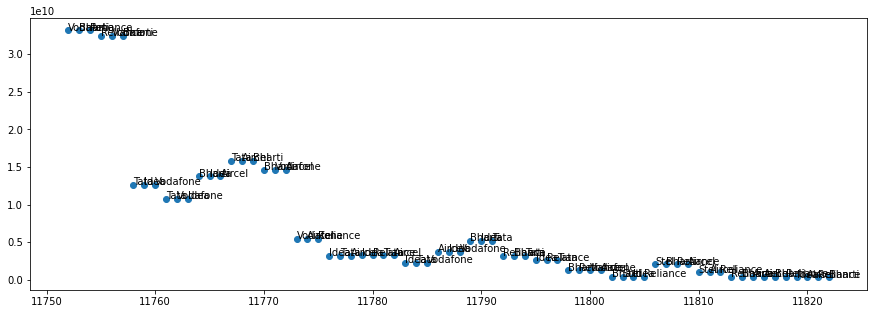

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,5))
# X axis : lotID
# Y axis : amount
plt.scatter(merged['lotId'], merged['amount'])

for i, winner in enumerate(merged['winner']):
  plt.annotate(winner, (merged['lotId'][i], merged['amount'][i]))

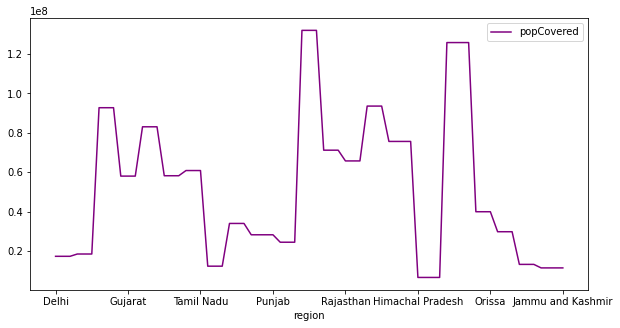

In [ ]:
merged.plot(x='region', y='popCovered',figsize=(10,5),color='purple')

For each company as we have kind of 6 of them lets find out:
*   Number of wins
*   Total MOney Spend above reserved price
*   Average bids
*   Avg Winning bid over reserved 
*   Total population covered 
*   Overall population covered
*   Average population coved 
*   Regions


In [ ]:
dict_for_Overall_Data = {"owner":[], "population":[], "average_population":[], "total_spend":[], "average_spend":[], "average_spend_over_reserve":[]}

In [ ]:
def Get_Insights(For_Winner):
    # Prepare Variables
    Number_of_Wins = 0
    Total_Spend = int(0)
    Average_Biding_Price = 0
    Average_Biding_Price_Over_Reserved = 0
    Population_Coverd = 0
    Average_Population_Covered = 0
    Regions = set()

    for index, row in merged.iterrows():
        if row['winner'] == For_Winner:
            Number_of_Wins += 1
            Total_Spend += row['headlinePriceLocal']
            Average_Biding_Price_Over_Reserved +=  row['headlinePriceLocal'] -  row['reservePriceLocal']
            Population_Coverd += row['popCovered']
            Regions.add(row['region'])
    

    Average_Biding_Price = Total_Spend / Number_of_Wins
    Average_Biding_Price_Over_Reserved /= Number_of_Wins
    Average_Population_Covered = Population_Coverd / Number_of_Wins

    print(For_Winner)
    print("Won in ", Number_of_Wins, "  Bids") 
    print("Total Spend : ",Total_Spend)
    print("Average Bidding Price : ", round(Average_Biding_Price, 2))
    print("Average Bidding prie over Reserved : ", round(Average_Biding_Price_Over_Reserved, 2))
    print("Total population Coverd : ", Population_Coverd)
    dict_for_Overall_Data["owner"].append(For_Winner)
    dict_for_Overall_Data["population"].append(Population_Coverd)
    dict_for_Overall_Data["average_population"].append(round(Average_Population_Covered, 2))
    dict_for_Overall_Data["total_spend"].append(Total_Spend)
    dict_for_Overall_Data["average_spend"].append(round(Average_Biding_Price, 2))
    dict_for_Overall_Data["average_spend_over_reserve"].append(round(Average_Biding_Price_Over_Reserved, 2))
    print("Average Population Coverd : ", round(Average_Population_Covered, 2))
    print("Regions Coverd are : ", Regions)
    print("-----------------------------------------------------------------------------------------------------")
    #return dict_for_Population_Overall

In [ ]:
# dict_for_Population_Overall = {"owner":[],"population":[]}
for winner in merged['winner'].unique():
    Get_Insights(winner)
    print("")

Vodafone
Won in  9   Bids
Total Spend :  116190000000.0
Average Bidding Price :  12910000000.0
Average Bidding prie over Reserved :  10598888888.89
Total population Coverd :  492143802.0
Average Population Coverd :  54682644.67
Regions Coverd are :  {'Maharashtra', 'Tamil Nadu', 'Gujarat', 'Uttar Pradesh East', 'Haryana', 'West Bengal', 'Mumbai', 'Delhi', 'Kolkata'}
-----------------------------------------------------------------------------------------------------

Bharti
Won in  13   Bids
Total Spend :  122940000000.0
Average Bidding Price :  9456923076.92
Average Bidding prie over Reserved :  7833846153.85
Total population Coverd :  637859819.0
Average Population Coverd :  49066139.92
Regions Coverd are :  {'Karnataka', 'Himachal Pradesh', 'Andhra Pradesh', 'Tamil Nadu', 'Rajasthan', 'Uttar Pradesh West', 'West Bengal', 'Mumbai', 'Jammu and Kashmir', 'Delhi', 'North East', 'Bihar', 'Assam'}
--------------------------------------------------------------------------------------------

In [ ]:
print(dict_for_Overall_Data)

{'owner': ['Vodafone', 'Bharti', 'Reliance', 'Tata', 'Idea', 'Aircel', 'Stel'], 'population': [492143802.0, 637859819.0, 538758082.0, 526440126.0, 635650918.0, 704958746.0, 172433353.0], 'average_population': [54682644.67, 49066139.92, 41442929.38, 58493347.33, 57786447.09, 54227595.85, 57477784.33], 'total_spend': [116190000000.0, 122940000000.0, 85830000000.0, 58640000000.0, 57680000000.0, 64980000000.0, 3370000000.0], 'average_spend': [12910000000.0, 9456923076.92, 6602307692.31, 6515555555.56, 5243636363.64, 4998461538.46, 1123333333.33], 'average_spend_over_reserve': [10598888888.89, 7833846153.85, 5510000000.0, 4648888888.89, 3661818181.82, 3683076923.08, 823333333.33]}


### Plots


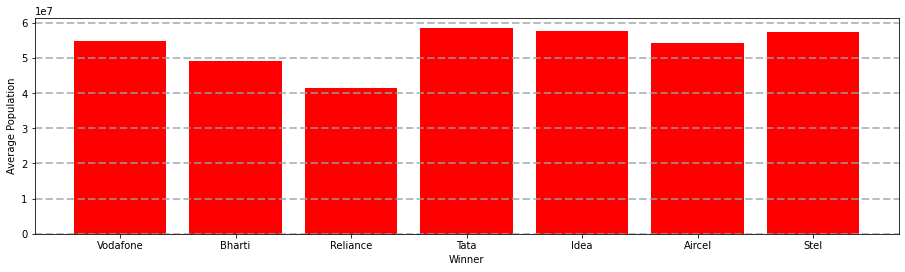

In [ ]:
# Plot of Average population of each owner  
fig = plt.figure(figsize=(12, 3))
ax = fig.add_axes([0,0,1,1])
langs = dict_for_Overall_Data['owner']
students = dict_for_Overall_Data['average_population']
ax.bar(langs,students,color='red')
plt.xlabel('Winner')
plt.ylabel('Average Population')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

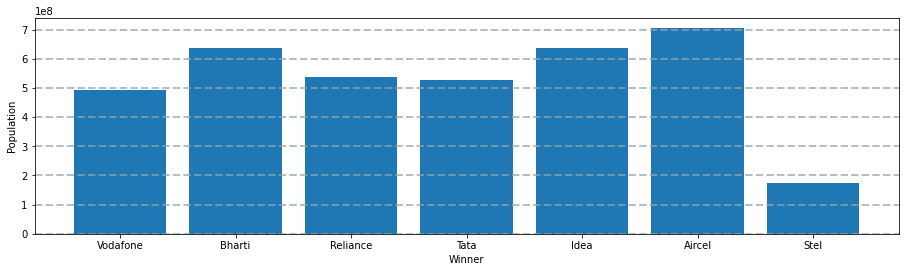

In [ ]:
# Plot of Total population of each owner
fig = plt.figure(figsize=(12, 3))
ax = fig.add_axes([0,0,1,1])
langs = dict_for_Overall_Data['owner']
students = dict_for_Overall_Data['population']
ax.bar(langs,students)
plt.xlabel('Winner')
plt.ylabel('Population')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

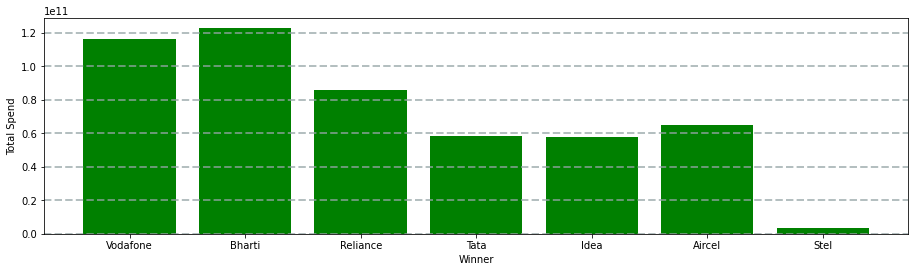

In [ ]:
# Plot of total spending of each owner
fig = plt.figure(figsize=(12, 3))
ax = fig.add_axes([0,0,1,1])
langs = dict_for_Overall_Data['owner']
students = dict_for_Overall_Data['total_spend']
ax.bar(langs,students,color='green')
plt.xlabel('Winner')
plt.ylabel('Total Spend')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

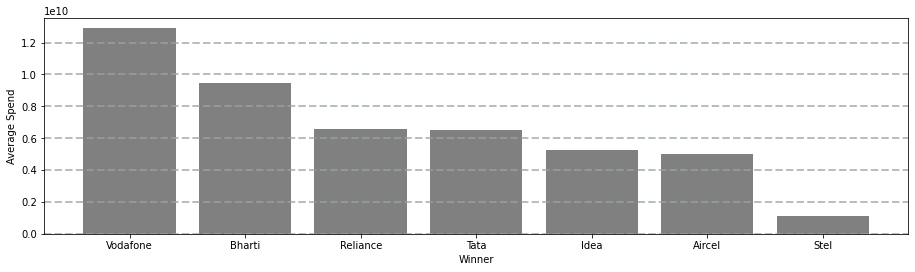

In [ ]:
# plot of average spending of each ownerr  
fig = plt.figure(figsize=(12, 3))
ax = fig.add_axes([0,0,1,1])
langs = dict_for_Overall_Data['owner']
students = dict_for_Overall_Data['average_spend']
ax.bar(langs,students,color='grey')
plt.xlabel('Winner')
plt.ylabel('Average Spend')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

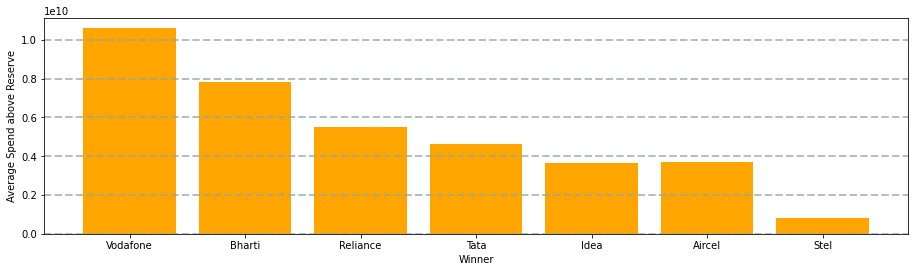

In [ ]:
# plot of average spending over reserve  
fig = plt.figure(figsize=(12, 3))
ax = fig.add_axes([0,0,1,1])
langs = dict_for_Overall_Data['owner']
students = dict_for_Overall_Data['average_spend_over_reserve']
ax.bar(langs,students,color='orange')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xlabel('Winner')
plt.ylabel('Average Spend above Reserve')
plt.show()

### Making dataframe compatible

In [ ]:
# Make a copy to save preds for next year
Data_3G_next_year_preds = merged.copy()

In [ ]:
# Model
# Remove column name 
merged.drop(['minAmount', 'amount'], axis = 1)

,awardId,lotId,awardName,countryName,alpha3code,nBidders,date,awardClassDescription,availableSpectrumPaired,availableSpectrumUnpaired,licenceUse,awardComments,lotName,winner,freqBand,nationalLicence,region,blockFreq,paired,unpaired,licenceDuration,popCovered,reservePriceLocal,headlinePriceLocal,entrantReserved,lotComments,year
0,242,11752,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Delhi A,Vodafone,2.1GHz,0,Delhi,uplink: 1959-1964MHz,10.0,0.0,20.0,17403916.0,3.200000e+09,3.317000e+10,0.0,NaN,0.0
1,242,11753,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Delhi B,Bharti,2.1GHz,0,Delhi,uplink: 1969-1974MHz,10.0,0.0,20.0,17403916.0,3.200000e+09,3.317000e+10,0.0,NaN,0.0
2,242,11754,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Delhi C,Reliance,2.1GHz,0,Delhi,uplink: 1974-1979MHz,10.0,0.0,20.0,17403916.0,3.200000e+09,3.317000e+10,0.0,NaN,0.0
3,242,11755,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Mumbai A,Reliance,2.1GHz,0,Mumbai,uplink: 1959-1964MHz,10.0,0.0,20.0,18571429.0,3.200000e+09,3.247000e+10,0.0,NaN,0.0
4,242,11756,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Mumbai B,Vodafone,2.1GHz,0,Mumbai,uplink: 1969-1974MHz,10.0,0.0,20.0,18571429.0,3.200000e+09,3.247000e+10,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,242,11818,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,North East C,Reliance,2.1GHz,0,North East,uplink: 1974-1979MHz,10.0,0.0,20.0,13310581.0,3.000000e+08,4.200000e+08,0.0,NaN,0.0
67,242,11819,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Jammu and Kashmir A,Idea,2.1GHz,0,Jammu and Kashmir,uplink: 1959-1964MHz,10.0,0.0,20.0,11528151.0,3.000000e+08,3.000000e+08,0.0,NaN,0.0
68,242,11820,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Jammu and Kashmir B,Aircel,2.1GHz,0,Jammu and Kashmir,uplink: 1964-1969MHz,10.0,0.0,20.0,11528151.0,3.000000e+08,3.000000e+08,0.0,NaN,0.0
69,242,11821,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Jammu and Kashmir C,Reliance,2.1GHz,0,Jammu and Kashmir,uplink: 1969-1974MHz,10.0,0.0,20.0,11528151.0,3.000000e+08,3.000000e+08,0.0,NaN,0.0


### Handle Null Values


In [ ]:
# Handle Nulls
merged_cols = merged.columns.to_list()
mv = merged[merged_cols].isnull().sum()
mp = mv / len(merged)*100
mp

awardId                        0.0
lotId                          0.0
awardName                      0.0
countryName                    0.0
alpha3code                     0.0
nBidders                       0.0
date                           0.0
awardClassDescription          0.0
availableSpectrumPaired        0.0
availableSpectrumUnpaired      0.0
licenceUse                     0.0
awardComments                100.0
lotName                        0.0
winner                         0.0
freqBand                       0.0
nationalLicence                0.0
region                         0.0
blockFreq                      0.0
paired                         0.0
unpaired                       0.0
licenceDuration                0.0
popCovered                     0.0
reservePriceLocal              0.0
headlinePriceLocal             0.0
entrantReserved                0.0
lotComments                  100.0
year                           0.0
amount                         0.0
minAmount           

In [ ]:
# Drop columns with null values 
# These columns have null value throughout
merged = merged.drop(['lotComments', 'awardComments'], axis = 1)

In [ ]:
# Delete columns which have only one or null values overall
for col in merged.columns.to_list():
    count = merged[col].nunique()
    if count == 1:
        del merged[col]
        print(col)
merged

awardId
awardName
countryName
alpha3code
nBidders
date
awardClassDescription
availableSpectrumPaired
availableSpectrumUnpaired
licenceUse
freqBand
nationalLicence
paired
unpaired
licenceDuration
entrantReserved
year


,lotId,lotName,winner,region,blockFreq,popCovered,reservePriceLocal,headlinePriceLocal,amount,minAmount
0,11752,Delhi A,Vodafone,Delhi,uplink: 1959-1964MHz,17403916.0,3.200000e+09,3.317000e+10,3.317000e+10,3.200000e+09
1,11753,Delhi B,Bharti,Delhi,uplink: 1969-1974MHz,17403916.0,3.200000e+09,3.317000e+10,3.317000e+10,3.200000e+09
2,11754,Delhi C,Reliance,Delhi,uplink: 1974-1979MHz,17403916.0,3.200000e+09,3.317000e+10,3.317000e+10,3.200000e+09
3,11755,Mumbai A,Reliance,Mumbai,uplink: 1959-1964MHz,18571429.0,3.200000e+09,3.247000e+10,3.247000e+10,3.200000e+09
4,11756,Mumbai B,Vodafone,Mumbai,uplink: 1969-1974MHz,18571429.0,3.200000e+09,3.247000e+10,3.247000e+10,3.200000e+09
...,...,...,...,...,...,...,...,...,...,...
66,11818,North East C,Reliance,North East,uplink: 1974-1979MHz,13310581.0,3.000000e+08,4.200000e+08,4.200000e+08,3.000000e+08
67,11819,Jammu and Kashmir A,Idea,Jammu and Kashmir,uplink: 1959-1964MHz,11528151.0,3.000000e+08,3.000000e+08,3.000000e+08,3.000000e+08
68,11820,Jammu and Kashmir B,Aircel,Jammu and Kashmir,uplink: 1964-1969MHz,11528151.0,3.000000e+08,3.000000e+08,3.000000e+08,3.000000e+08
69,11821,Jammu and Kashmir C,Reliance,Jammu and Kashmir,uplink: 1969-1974MHz,11528151.0,3.000000e+08,3.000000e+08,3.000000e+08,3.000000e+08


In [ ]:
'''
# Label Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

merged['lotName'] = LabelEncoder().fit_transform(merged.lotName)
merged['winner'] = LabelEncoder().fit_transform(merged.winner)
merged['region'] = LabelEncoder().fit_transform(merged.region)
merged['blockFreq'] = LabelEncoder().fit_transform(merged.blockFreq)

merged
# One Hot Encoding
ohc = OneHotEncoder()
ohe = ohc.fit_transform(merged.winner.value.reshape(-1, 1)).to_array()
mergedOHE = pd.Dataframe(ohe, columns = ["Winner_" +str(ohc.categories[0][i])
                                                    for i in range(len(ohc.categories_[0]))])
mergedOHE = pd.concat([merged, mergedOHE], axis = 1)
merged
'''

'\n# Label Encoding\nfrom sklearn.preprocessing import LabelEncoder\nfrom sklearn.preprocessing import OneHotEncoder\n\nmerged[\'lotName\'] = LabelEncoder().fit_transform(merged.lotName)\nmerged[\'winner\'] = LabelEncoder().fit_transform(merged.winner)\nmerged[\'region\'] = LabelEncoder().fit_transform(merged.region)\nmerged[\'blockFreq\'] = LabelEncoder().fit_transform(merged.blockFreq)\n\nmerged\n# One Hot Encoding\nohc = OneHotEncoder()\nohe = ohc.fit_transform(merged.winner.value.reshape(-1, 1)).to_array()\nmergedOHE = pd.Dataframe(ohe, columns = ["Winner_" +str(ohc.categories[0][i])\n                                                    for i in range(len(ohc.categories_[0]))])\nmergedOHE = pd.concat([merged, mergedOHE], axis = 1)\nmerged\n'

### Frequency Encoding

In [ ]:
# Frequency Encoding
def Frequency_Encode(col):
    # print(col)
    fe = merged.groupby(col).size() / len(merged)
    merged.loc[:, col + '_freq_encode'] = merged[col].map(fe)
    merged

for col in merged.columns.to_list():
    # print(col, type(merged[col]))
    if merged[col].dtype == 'object':
        Frequency_Encode(col)
        del merged[col]

merged

,lotId,popCovered,reservePriceLocal,headlinePriceLocal,amount,minAmount,lotName_freq_encode,winner_freq_encode,region_freq_encode,blockFreq_freq_encode
0,11752,17403916.0,3.200000e+09,3.317000e+10,3.317000e+10,3.200000e+09,0.014085,0.126761,0.042254,0.309859
1,11753,17403916.0,3.200000e+09,3.317000e+10,3.317000e+10,3.200000e+09,0.014085,0.183099,0.042254,0.309859
2,11754,17403916.0,3.200000e+09,3.317000e+10,3.317000e+10,3.200000e+09,0.014085,0.183099,0.042254,0.309859
3,11755,18571429.0,3.200000e+09,3.247000e+10,3.247000e+10,3.200000e+09,0.014085,0.183099,0.042254,0.309859
4,11756,18571429.0,3.200000e+09,3.247000e+10,3.247000e+10,3.200000e+09,0.014085,0.126761,0.042254,0.309859
...,...,...,...,...,...,...,...,...,...,...
66,11818,13310581.0,3.000000e+08,4.200000e+08,4.200000e+08,3.000000e+08,0.014085,0.183099,0.042254,0.309859
67,11819,11528151.0,3.000000e+08,3.000000e+08,3.000000e+08,3.000000e+08,0.014085,0.154930,0.056338,0.309859
68,11820,11528151.0,3.000000e+08,3.000000e+08,3.000000e+08,3.000000e+08,0.014085,0.183099,0.056338,0.070423
69,11821,11528151.0,3.000000e+08,3.000000e+08,3.000000e+08,3.000000e+08,0.014085,0.183099,0.056338,0.309859


In [ ]:
x = merged.copy()
del x['amount']
del x['minAmount']
# del x['headlinePriceLocal']
y = pd.DataFrame(merged.headlinePriceLocal)
x

,lotId,popCovered,reservePriceLocal,headlinePriceLocal,lotName_freq_encode,winner_freq_encode,region_freq_encode,blockFreq_freq_encode
0,11752,17403916.0,3.200000e+09,3.317000e+10,0.014085,0.126761,0.042254,0.309859
1,11753,17403916.0,3.200000e+09,3.317000e+10,0.014085,0.183099,0.042254,0.309859
2,11754,17403916.0,3.200000e+09,3.317000e+10,0.014085,0.183099,0.042254,0.309859
3,11755,18571429.0,3.200000e+09,3.247000e+10,0.014085,0.183099,0.042254,0.309859
4,11756,18571429.0,3.200000e+09,3.247000e+10,0.014085,0.126761,0.042254,0.309859
...,...,...,...,...,...,...,...,...
66,11818,13310581.0,3.000000e+08,4.200000e+08,0.014085,0.183099,0.042254,0.309859
67,11819,11528151.0,3.000000e+08,3.000000e+08,0.014085,0.154930,0.056338,0.309859
68,11820,11528151.0,3.000000e+08,3.000000e+08,0.014085,0.183099,0.056338,0.070423
69,11821,11528151.0,3.000000e+08,3.000000e+08,0.014085,0.183099,0.056338,0.309859


In [ ]:
y

,headlinePriceLocal
0,3.317000e+10
1,3.317000e+10
2,3.317000e+10
3,3.247000e+10
4,3.247000e+10
...,...
66,4.200000e+08
67,3.000000e+08
68,3.000000e+08
69,3.000000e+08


In [ ]:
print(x.shape, y.shape)

(71, 8) (71, 1)


In [ ]:
# Generating Next year Expected Prices
x_test = merged.copy()
x_test['reservePriceLocal'] = x_test['headlinePriceLocal']
del x_test['amount']
del x_test['minAmount']
# del x['headlinePriceLocal']
y_test = pd.DataFrame(merged.headlinePriceLocal)
x_test

,lotId,popCovered,reservePriceLocal,headlinePriceLocal,lotName_freq_encode,winner_freq_encode,region_freq_encode,blockFreq_freq_encode
0,11752,17403916.0,3.317000e+10,3.317000e+10,0.014085,0.126761,0.042254,0.309859
1,11753,17403916.0,3.317000e+10,3.317000e+10,0.014085,0.183099,0.042254,0.309859
2,11754,17403916.0,3.317000e+10,3.317000e+10,0.014085,0.183099,0.042254,0.309859
3,11755,18571429.0,3.247000e+10,3.247000e+10,0.014085,0.183099,0.042254,0.309859
4,11756,18571429.0,3.247000e+10,3.247000e+10,0.014085,0.126761,0.042254,0.309859
...,...,...,...,...,...,...,...,...
66,11818,13310581.0,4.200000e+08,4.200000e+08,0.014085,0.183099,0.042254,0.309859
67,11819,11528151.0,3.000000e+08,3.000000e+08,0.014085,0.154930,0.056338,0.309859
68,11820,11528151.0,3.000000e+08,3.000000e+08,0.014085,0.183099,0.056338,0.070423
69,11821,11528151.0,3.000000e+08,3.000000e+08,0.014085,0.183099,0.056338,0.309859


### Correlarion Matrix

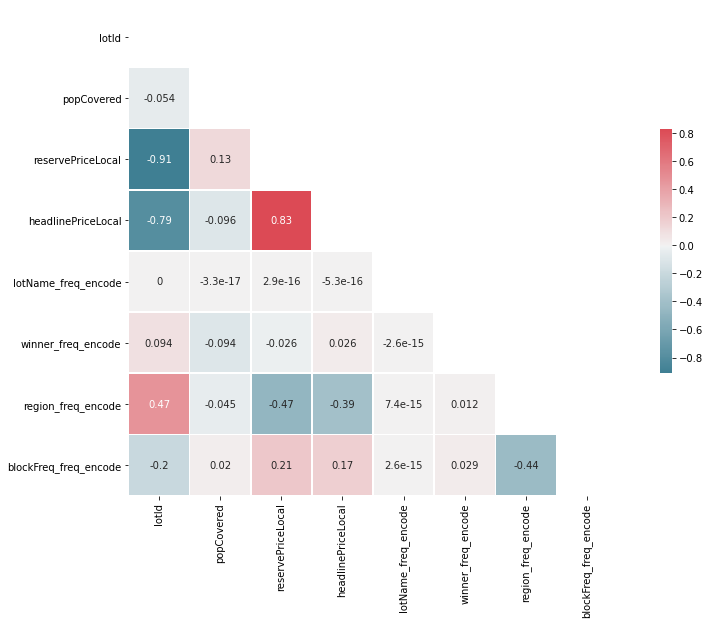

In [ ]:
# Compute the correlation matrix
corr = x.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

### Model

In [ ]:
# x has train
# y has target var
del x['headlinePriceLocal']

train_dataset = cb.Pool(x, y)
model = cb.CatBoostRegressor(loss_function='RMSE')
grid = {'iterations': [150, 200, 300],
        'learning_rate': [0.1],
        'depth': [8, 10, 15],
        'l2_leaf_reg': [3, 5]}
model.grid_search(grid, train_dataset)


0:	learn: 11460052192.1213551	test: 8117986814.6076860	best: 8117986814.6076860 (0)	total: 46.4ms	remaining: 6.92s
1:	learn: 10852720155.3613491	test: 7707122740.4471855	best: 7707122740.4471855 (1)	total: 47.7ms	remaining: 3.53s
2:	learn: 10119937672.6118164	test: 6737413660.9206495	best: 6737413660.9206495 (2)	total: 47.8ms	remaining: 2.34s
3:	learn: 9460424699.6803589	test: 5851343379.9670143	best: 5851343379.9670143 (3)	total: 48.3ms	remaining: 1.76s
4:	learn: 9042643259.5714493	test: 5598508577.3304348	best: 5598508577.3304348 (4)	total: 49.4ms	remaining: 1.43s
5:	learn: 8460597797.4619560	test: 5329974277.8308458	best: 5329974277.8308458 (5)	total: 49.9ms	remaining: 1.2s
6:	learn: 7978069810.3219242	test: 4629131359.1771679	best: 4629131359.1771679 (6)	total: 50.4ms	remaining: 1.03s
7:	learn: 7461084731.0788383	test: 4356863759.3698807	best: 4356863759.3698807 (7)	total: 51.6ms	remaining: 916ms
8:	learn: 6992423621.5532408	test: 4002077127.7145019	best: 4002077127.7145019 (8)	tot

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

In [ ]:
pred = model.predict(x)
rmse = (np.sqrt(mean_squared_error(y, pred)))
r2 = r2_score(y, pred)
print('Testing performance')
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 75049867.48
R2: 1.00


In [ ]:
# Take predictions on test datase
del x_test['headlinePriceLocal']
test_pred = model.predict(x_test)
rmse_test = (np.sqrt(mean_squared_error(x_test['reservePriceLocal'], test_pred)))
r2_test = r2_score(y, test_pred)
print('Testing performance')
print('RMSE: {:.2f}'.format(rmse_test))
print('R2: {:.2f}'.format(r2_test))
test_pred

Testing performance
RMSE: 5135391230.89
R2: 0.69


array([3.31195026e+10, 3.31632251e+10, 3.31632251e+10, 3.25920821e+10,
       3.24793187e+10, 3.23484627e+10, 1.26800767e+10, 1.26040432e+10,
       1.24653421e+10, 1.07472566e+10, 1.07817589e+10, 1.09480414e+10,
       1.37112095e+10, 1.35903863e+10, 1.38838445e+10, 1.56914916e+10,
       1.57250269e+10, 1.57250269e+10, 1.48925525e+10, 1.45868237e+10,
       1.45575731e+10, 1.65849563e+10, 1.74735422e+10, 1.62762021e+10,
       1.27730782e+10, 1.27756605e+10, 1.32388855e+10, 1.23370962e+10,
       1.06900951e+10, 1.20011266e+10, 1.23739601e+10, 1.26725273e+10,
       1.27403228e+10, 1.27403228e+10, 1.05793499e+10, 1.02822891e+10,
       1.02725304e+10, 1.22027818e+10, 1.19717824e+10, 1.17085093e+10,
       1.05966124e+10, 1.04718063e+10, 1.00880532e+10, 9.13269121e+09,
       9.45019209e+09, 8.92200365e+09, 1.22935581e+09, 1.23871070e+09,
       1.37081878e+09, 1.25931594e+09, 3.50896396e+08, 3.90303974e+08,
       3.70843185e+08, 3.52996057e+08, 2.81093725e+09, 2.10948532e+09,
      

Text(0.5, 0, 'CatBoost Feature Importance')

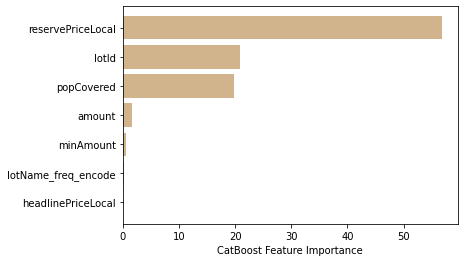

In [ ]:
sorted_feature_importance = model.feature_importances_.argsort()
'''
print(type(sorted_feature_importance))
print(type(merged))
print(type(x))
print(type(y))

df = pd.DataFrame(merged.data,columns=merged.feature_names)
df['target'] = pd.Series(merged.headlinePriceLocal)
'''

plt.barh(merged.columns[sorted_feature_importance], 
        model.feature_importances_[sorted_feature_importance], 
        color='tan')
plt.xlabel("CatBoost Feature Importance") 



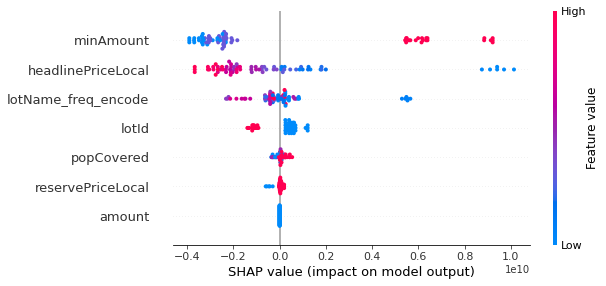

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x)
shap.summary_plot(shap_values, x, feature_names = merged.columns[sorted_feature_importance])


### Predictions

In [ ]:
# ITs right time to save the preds
Data_3G_next_year_preds

,awardId,lotId,awardName,countryName,alpha3code,nBidders,date,awardClassDescription,availableSpectrumPaired,availableSpectrumUnpaired,licenceUse,awardComments,lotName,winner,freqBand,nationalLicence,region,blockFreq,paired,unpaired,licenceDuration,popCovered,reservePriceLocal,headlinePriceLocal,entrantReserved,lotComments,year,amount,minAmount
0,242,11752,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Delhi A,Vodafone,2.1GHz,0,Delhi,uplink: 1959-1964MHz,10.0,0.0,20.0,17403916.0,3.200000e+09,3.317000e+10,0.0,NaN,0.0,3.317000e+10,3.200000e+09
1,242,11753,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Delhi B,Bharti,2.1GHz,0,Delhi,uplink: 1969-1974MHz,10.0,0.0,20.0,17403916.0,3.200000e+09,3.317000e+10,0.0,NaN,0.0,3.317000e+10,3.200000e+09
2,242,11754,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Delhi C,Reliance,2.1GHz,0,Delhi,uplink: 1974-1979MHz,10.0,0.0,20.0,17403916.0,3.200000e+09,3.317000e+10,0.0,NaN,0.0,3.317000e+10,3.200000e+09
3,242,11755,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Mumbai A,Reliance,2.1GHz,0,Mumbai,uplink: 1959-1964MHz,10.0,0.0,20.0,18571429.0,3.200000e+09,3.247000e+10,0.0,NaN,0.0,3.247000e+10,3.200000e+09
4,242,11756,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Mumbai B,Vodafone,2.1GHz,0,Mumbai,uplink: 1969-1974MHz,10.0,0.0,20.0,18571429.0,3.200000e+09,3.247000e+10,0.0,NaN,0.0,3.247000e+10,3.200000e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,242,11818,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,North East C,Reliance,2.1GHz,0,North East,uplink: 1974-1979MHz,10.0,0.0,20.0,13310581.0,3.000000e+08,4.200000e+08,0.0,NaN,0.0,4.200000e+08,3.000000e+08
67,242,11819,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Jammu and Kashmir A,Idea,2.1GHz,0,Jammu and Kashmir,uplink: 1959-1964MHz,10.0,0.0,20.0,11528151.0,3.000000e+08,3.000000e+08,0.0,NaN,0.0,3.000000e+08,3.000000e+08
68,242,11820,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Jammu and Kashmir B,Aircel,2.1GHz,0,Jammu and Kashmir,uplink: 1964-1969MHz,10.0,0.0,20.0,11528151.0,3.000000e+08,3.000000e+08,0.0,NaN,0.0,3.000000e+08,3.000000e+08
69,242,11821,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Jammu and Kashmir C,Reliance,2.1GHz,0,Jammu and Kashmir,uplink: 1969-1974MHz,10.0,0.0,20.0,11528151.0,3.000000e+08,3.000000e+08,0.0,NaN,0.0,3.000000e+08,3.000000e+08


In [ ]:
Data_3G_next_year_preds['reservePriceLocal'] = Data_3G_next_year_preds['headlinePriceLocal']
Data_3G_next_year_preds['minAmount'] = Data_3G_next_year_preds['headlinePriceLocal']
Data_3G_next_year_preds

,awardId,lotId,awardName,countryName,alpha3code,nBidders,date,awardClassDescription,availableSpectrumPaired,availableSpectrumUnpaired,licenceUse,awardComments,lotName,winner,freqBand,nationalLicence,region,blockFreq,paired,unpaired,licenceDuration,popCovered,reservePriceLocal,headlinePriceLocal,entrantReserved,lotComments,year,amount,minAmount
0,242,11752,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Delhi A,Vodafone,2.1GHz,0,Delhi,uplink: 1959-1964MHz,10.0,0.0,20.0,17403916.0,3.317000e+10,3.317000e+10,0.0,NaN,0.0,3.317000e+10,3.317000e+10
1,242,11753,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Delhi B,Bharti,2.1GHz,0,Delhi,uplink: 1969-1974MHz,10.0,0.0,20.0,17403916.0,3.317000e+10,3.317000e+10,0.0,NaN,0.0,3.317000e+10,3.317000e+10
2,242,11754,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Delhi C,Reliance,2.1GHz,0,Delhi,uplink: 1974-1979MHz,10.0,0.0,20.0,17403916.0,3.317000e+10,3.317000e+10,0.0,NaN,0.0,3.317000e+10,3.317000e+10
3,242,11755,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Mumbai A,Reliance,2.1GHz,0,Mumbai,uplink: 1959-1964MHz,10.0,0.0,20.0,18571429.0,3.247000e+10,3.247000e+10,0.0,NaN,0.0,3.247000e+10,3.247000e+10
4,242,11756,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Mumbai B,Vodafone,2.1GHz,0,Mumbai,uplink: 1969-1974MHz,10.0,0.0,20.0,18571429.0,3.247000e+10,3.247000e+10,0.0,NaN,0.0,3.247000e+10,3.247000e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,242,11818,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,North East C,Reliance,2.1GHz,0,North East,uplink: 1974-1979MHz,10.0,0.0,20.0,13310581.0,4.200000e+08,4.200000e+08,0.0,NaN,0.0,4.200000e+08,4.200000e+08
67,242,11819,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Jammu and Kashmir A,Idea,2.1GHz,0,Jammu and Kashmir,uplink: 1959-1964MHz,10.0,0.0,20.0,11528151.0,3.000000e+08,3.000000e+08,0.0,NaN,0.0,3.000000e+08,3.000000e+08
68,242,11820,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Jammu and Kashmir B,Aircel,2.1GHz,0,Jammu and Kashmir,uplink: 1964-1969MHz,10.0,0.0,20.0,11528151.0,3.000000e+08,3.000000e+08,0.0,NaN,0.0,3.000000e+08,3.000000e+08
69,242,11821,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Jammu and Kashmir C,Reliance,2.1GHz,0,Jammu and Kashmir,uplink: 1969-1974MHz,10.0,0.0,20.0,11528151.0,3.000000e+08,3.000000e+08,0.0,NaN,0.0,3.000000e+08,3.000000e+08


In [ ]:
Data_3G_next_year_preds['headlinePriceLocal'] = test_pred
Data_3G_next_year_preds['amount'] = test_pred

Data_3G_next_year_preds

,awardId,lotId,awardName,countryName,alpha3code,nBidders,date,awardClassDescription,availableSpectrumPaired,availableSpectrumUnpaired,licenceUse,awardComments,lotName,winner,freqBand,nationalLicence,region,blockFreq,paired,unpaired,licenceDuration,popCovered,reservePriceLocal,headlinePriceLocal,entrantReserved,lotComments,year,amount,minAmount
0,242,11752,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Delhi A,Vodafone,2.1GHz,0,Delhi,uplink: 1959-1964MHz,10.0,0.0,20.0,17403916.0,3.317000e+10,3.311950e+10,0.0,NaN,0.0,3.311950e+10,3.317000e+10
1,242,11753,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Delhi B,Bharti,2.1GHz,0,Delhi,uplink: 1969-1974MHz,10.0,0.0,20.0,17403916.0,3.317000e+10,3.316323e+10,0.0,NaN,0.0,3.316323e+10,3.317000e+10
2,242,11754,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Delhi C,Reliance,2.1GHz,0,Delhi,uplink: 1974-1979MHz,10.0,0.0,20.0,17403916.0,3.317000e+10,3.316323e+10,0.0,NaN,0.0,3.316323e+10,3.317000e+10
3,242,11755,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Mumbai A,Reliance,2.1GHz,0,Mumbai,uplink: 1959-1964MHz,10.0,0.0,20.0,18571429.0,3.247000e+10,3.259208e+10,0.0,NaN,0.0,3.259208e+10,3.247000e+10
4,242,11756,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Mumbai B,Vodafone,2.1GHz,0,Mumbai,uplink: 1969-1974MHz,10.0,0.0,20.0,18571429.0,3.247000e+10,3.247932e+10,0.0,NaN,0.0,3.247932e+10,3.247000e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,242,11818,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,North East C,Reliance,2.1GHz,0,North East,uplink: 1974-1979MHz,10.0,0.0,20.0,13310581.0,4.200000e+08,4.379578e+08,0.0,NaN,0.0,4.379578e+08,4.200000e+08
67,242,11819,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Jammu and Kashmir A,Idea,2.1GHz,0,Jammu and Kashmir,uplink: 1959-1964MHz,10.0,0.0,20.0,11528151.0,3.000000e+08,3.083622e+08,0.0,NaN,0.0,3.083622e+08,3.000000e+08
68,242,11820,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Jammu and Kashmir B,Aircel,2.1GHz,0,Jammu and Kashmir,uplink: 1964-1969MHz,10.0,0.0,20.0,11528151.0,3.000000e+08,3.681745e+08,0.0,NaN,0.0,3.681745e+08,3.000000e+08
69,242,11821,3G auction,India,IND,9.0,2010-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Jammu and Kashmir C,Reliance,2.1GHz,0,Jammu and Kashmir,uplink: 1969-1974MHz,10.0,0.0,20.0,11528151.0,3.000000e+08,2.670993e+08,0.0,NaN,0.0,2.670993e+08,3.000000e+08


In [ ]:
Data_3G_next_year_preds['date'] = Data_3G_next_year_preds['date'].apply(lambda x: '2011-05-19')  
Data_3G_next_year_preds

,awardId,lotId,awardName,countryName,alpha3code,nBidders,date,awardClassDescription,availableSpectrumPaired,availableSpectrumUnpaired,licenceUse,awardComments,lotName,winner,freqBand,nationalLicence,region,blockFreq,paired,unpaired,licenceDuration,popCovered,reservePriceLocal,headlinePriceLocal,entrantReserved,lotComments,year,amount,minAmount
0,242,11752,3G auction,India,IND,9.0,2011-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Delhi A,Vodafone,2.1GHz,0,Delhi,uplink: 1959-1964MHz,10.0,0.0,20.0,17403916.0,3.317000e+10,3.311950e+10,0.0,NaN,0.0,3.311950e+10,3.317000e+10
1,242,11753,3G auction,India,IND,9.0,2011-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Delhi B,Bharti,2.1GHz,0,Delhi,uplink: 1969-1974MHz,10.0,0.0,20.0,17403916.0,3.317000e+10,3.316323e+10,0.0,NaN,0.0,3.316323e+10,3.317000e+10
2,242,11754,3G auction,India,IND,9.0,2011-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Delhi C,Reliance,2.1GHz,0,Delhi,uplink: 1974-1979MHz,10.0,0.0,20.0,17403916.0,3.317000e+10,3.316323e+10,0.0,NaN,0.0,3.316323e+10,3.317000e+10
3,242,11755,3G auction,India,IND,9.0,2011-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Mumbai A,Reliance,2.1GHz,0,Mumbai,uplink: 1959-1964MHz,10.0,0.0,20.0,18571429.0,3.247000e+10,3.259208e+10,0.0,NaN,0.0,3.259208e+10,3.247000e+10
4,242,11756,3G auction,India,IND,9.0,2011-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Mumbai B,Vodafone,2.1GHz,0,Mumbai,uplink: 1969-1974MHz,10.0,0.0,20.0,18571429.0,3.247000e+10,3.247932e+10,0.0,NaN,0.0,3.247932e+10,3.247000e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,242,11818,3G auction,India,IND,9.0,2011-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,North East C,Reliance,2.1GHz,0,North East,uplink: 1974-1979MHz,10.0,0.0,20.0,13310581.0,4.200000e+08,4.379578e+08,0.0,NaN,0.0,4.379578e+08,4.200000e+08
67,242,11819,3G auction,India,IND,9.0,2011-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Jammu and Kashmir A,Idea,2.1GHz,0,Jammu and Kashmir,uplink: 1959-1964MHz,10.0,0.0,20.0,11528151.0,3.000000e+08,3.083622e+08,0.0,NaN,0.0,3.083622e+08,3.000000e+08
68,242,11820,3G auction,India,IND,9.0,2011-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Jammu and Kashmir B,Aircel,2.1GHz,0,Jammu and Kashmir,uplink: 1964-1969MHz,10.0,0.0,20.0,11528151.0,3.000000e+08,3.681745e+08,0.0,NaN,0.0,3.681745e+08,3.000000e+08
69,242,11821,3G auction,India,IND,9.0,2011-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Jammu and Kashmir C,Reliance,2.1GHz,0,Jammu and Kashmir,uplink: 1969-1974MHz,10.0,0.0,20.0,11528151.0,3.000000e+08,2.670993e+08,0.0,NaN,0.0,2.670993e+08,3.000000e+08


### Viewing Next Year Predictions along with saving them.

In [ ]:
Data_3G_next_year_preds.to_csv('Spectrum_Data_India_3G_next_year_preds.csv', index=False)
Data_3G_next_year_preds

,awardId,lotId,awardName,countryName,alpha3code,nBidders,date,awardClassDescription,availableSpectrumPaired,availableSpectrumUnpaired,licenceUse,awardComments,lotName,winner,freqBand,nationalLicence,region,blockFreq,paired,unpaired,licenceDuration,popCovered,reservePriceLocal,headlinePriceLocal,entrantReserved,lotComments,year,amount,minAmount
0,242,11752,3G auction,India,IND,9.0,2011-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Delhi A,Vodafone,2.1GHz,0,Delhi,uplink: 1959-1964MHz,10.0,0.0,20.0,17403916.0,3.317000e+10,3.311950e+10,0.0,NaN,0.0,3.311950e+10,3.317000e+10
1,242,11753,3G auction,India,IND,9.0,2011-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Delhi B,Bharti,2.1GHz,0,Delhi,uplink: 1969-1974MHz,10.0,0.0,20.0,17403916.0,3.317000e+10,3.316323e+10,0.0,NaN,0.0,3.316323e+10,3.317000e+10
2,242,11754,3G auction,India,IND,9.0,2011-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Delhi C,Reliance,2.1GHz,0,Delhi,uplink: 1974-1979MHz,10.0,0.0,20.0,17403916.0,3.317000e+10,3.316323e+10,0.0,NaN,0.0,3.316323e+10,3.317000e+10
3,242,11755,3G auction,India,IND,9.0,2011-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Mumbai A,Reliance,2.1GHz,0,Mumbai,uplink: 1959-1964MHz,10.0,0.0,20.0,18571429.0,3.247000e+10,3.259208e+10,0.0,NaN,0.0,3.259208e+10,3.247000e+10
4,242,11756,3G auction,India,IND,9.0,2011-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Mumbai B,Vodafone,2.1GHz,0,Mumbai,uplink: 1969-1974MHz,10.0,0.0,20.0,18571429.0,3.247000e+10,3.247932e+10,0.0,NaN,0.0,3.247932e+10,3.247000e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,242,11818,3G auction,India,IND,9.0,2011-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,North East C,Reliance,2.1GHz,0,North East,uplink: 1974-1979MHz,10.0,0.0,20.0,13310581.0,4.200000e+08,4.379578e+08,0.0,NaN,0.0,4.379578e+08,4.200000e+08
67,242,11819,3G auction,India,IND,9.0,2011-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Jammu and Kashmir A,Idea,2.1GHz,0,Jammu and Kashmir,uplink: 1959-1964MHz,10.0,0.0,20.0,11528151.0,3.000000e+08,3.083622e+08,0.0,NaN,0.0,3.083622e+08,3.000000e+08
68,242,11820,3G auction,India,IND,9.0,2011-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Jammu and Kashmir B,Aircel,2.1GHz,0,Jammu and Kashmir,uplink: 1964-1969MHz,10.0,0.0,20.0,11528151.0,3.000000e+08,3.681745e+08,0.0,NaN,0.0,3.681745e+08,3.000000e+08
69,242,11821,3G auction,India,IND,9.0,2011-05-19,Auction - Largely standard clock,710.0,0.0,neutral,NaN,Jammu and Kashmir C,Reliance,2.1GHz,0,Jammu and Kashmir,uplink: 1969-1974MHz,10.0,0.0,20.0,11528151.0,3.000000e+08,2.670993e+08,0.0,NaN,0.0,2.670993e+08,3.000000e+08


In [ ]:
from google.colab import files
files.download("Spectrum_Data_India_3G_next_year_preds.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>